# Importing Necessarry Dependencies

In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score

# The Data

In [2]:
df=pd.read_csv("Cardio_vascular.csv")

In [3]:
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,51,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,54,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,71,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,60,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,61,0,0,138,294,1,1,106,0,1.9,1,3,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1020,59,1,1,173,221,0,1,164,1,1.2,2,0,2,1
1021,60,1,0,174,258,0,0,141,1,1.4,1,1,3,0
1022,47,1,0,173,275,0,0,118,1,0.0,1,1,2,0
1023,50,0,0,165,254,0,0,159,0,3.8,2,0,2,1


# Exploratory Data Analysis

In [4]:
# shape of the data
df.shape

(1025, 14)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB


In [6]:
# we see no missing values here.

In [7]:
# checking for duplicate records
df[df.duplicated(keep=False)]

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
46,41,1,1,143,203,0,1,132,0,0.0,1,0,1,1
72,56,1,0,178,249,1,0,144,1,1.2,1,1,2,0
73,59,1,0,162,177,0,1,162,1,0.0,2,1,3,0
102,54,1,1,162,309,0,1,156,0,0.0,2,0,3,1
155,54,1,1,162,309,0,1,156,0,0.0,2,0,3,1
159,41,1,1,143,157,0,1,182,0,0.0,2,0,2,1
249,42,1,2,159,180,0,1,150,0,0.0,2,0,2,1
323,66,1,1,159,246,0,1,120,1,0.0,1,3,1,0
345,66,1,1,159,246,0,1,120,1,0.0,1,3,1,0
411,56,1,0,178,249,1,0,144,1,1.2,1,1,2,0


In [8]:
# frequncy of duplicated records
print(df.duplicated(keep=False).sum())

20


In [9]:
# we see a very low number of duplicates which highly suggests that it is just a matter of coincidence.
# hence we dont get rid of them.

In [10]:
# FIRST STEP is to understand the Problem Statement, Different Independent and Dependent Variables.

#### The dataset used in this article is the Cleveland Heart Disease dataset. There are 14 columns in the dataset, 
which are described below.
1. Age, in years
2. Sex, 1 = male; 0 = female
3. cp: chest pain type
– Value 0: typical angina
– Value 1: atypical angina
– Value 2: non-anginal pain
– Value 3: asymptomatic
4. restbps: resting blood pressure (in mm Hg on admission to the hospital)
5. chol: serum cholestoral in mg/dAttribute Information:
6. fbs: (fasting blood sugar > 120 mg/dl) 1 = true; 0 =false
7. restecg: resting electrocardiographic results
– Value 0: normal
– Value 1: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of >0.05 mV)
– Value 2: showing probable or definite left ventricu lar hypertrophy by Estes’ criteria
8. thalach: maximum heart rate achieved during stress TEST
9. exang: exercise induced angina, 1 = yes; 0 = no
10. oldpeak = ST depression induced by exercise relative to rest
11. slope: the slope of the peak exercise ST segment
– Value 0: upsloping
– Value 1: flat
– Value 2: downsloping
12. ca: number of major vessels (0-4) colored by flourosopy
13. thal: thalassmia, 0 = null; 1=normal; 2 = fixed defect; 3 = reversible defect
14. condition (target) : 0 = no disease, 1 = disease


In [11]:
#Test Cost

# 4.rest_bp..Immediate results, no additional cost
# 5.cholesterol…….$5.20, need one day laboratory work
# 6.fast_bloodsugar…….$5.20, need one day laboratory work
# 7.rest_ecg…$15.50, need one day laboratory work
# 8.stress_HR…$102.90, need one day laboratory work
# 9.Exercise_cp…..$87.30, need one day laboratory work
# 10.STdepression_Exerc…$87.30, need one day laboratory work
# 11.slope…..$87.30, need one day laboratory work
# 12.coloured_vessels……..$100.90, need one day laboratory work
# 13.thalassmia……$102.90, need one day laboratory work"""

In [12]:
# changing the name of the columns for better understanding

In [13]:
df.rename(columns={"sex":"gender","cp":"rest_cp","trestbps":"rest_bp","chol":"cholesterol","fbs":"fast_bloodsugar",
                   "restecg":"rest_ecg","thalach":"stress_HR","exang":"Exercise_cp","oldpeak":"STdepression_Exerc",
                   "slope":"STpeak_exerc","ca":"coloured_vessels","thal":"thalassmia","target":"heart_disease"},inplace=True)

In [14]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   age                 1025 non-null   int64  
 1   gender              1025 non-null   int64  
 2   rest_cp             1025 non-null   int64  
 3   rest_bp             1025 non-null   int64  
 4   cholesterol         1025 non-null   int64  
 5   fast_bloodsugar     1025 non-null   int64  
 6   rest_ecg            1025 non-null   int64  
 7   stress_HR           1025 non-null   int64  
 8   Exercise_cp         1025 non-null   int64  
 9   STdepression_Exerc  1025 non-null   float64
 10  STpeak_exerc        1025 non-null   int64  
 11  coloured_vessels    1025 non-null   int64  
 12  thalassmia          1025 non-null   int64  
 13  heart_disease       1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB


In [15]:
# we see all the DATATYPES ARE integer or float as expected.

In [16]:
df.describe()

,age,gender,rest_cp,rest_bp,cholesterol,fast_bloodsugar,rest_ecg,stress_HR,Exercise_cp,STdepression_Exerc,STpeak_exerc,coloured_vessels,thalassmia,heart_disease
count,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000
mean,54.458537,0.695610,0.942439,148.078049,246.668293,0.149268,0.529756,149.218537,0.336585,1.052976,1.385366,0.754146,2.323902,0.513171
std,9.054764,0.460373,1.029641,23.059022,51.789267,0.356527,0.527878,23.002315,0.472772,1.191635,0.617755,1.030798,0.620660,0.500070
min,29.000000,0.000000,0.000000,71.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,0.000000,0.000000,131.000000,211.000000,0.000000,0.000000,132.000000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,56.000000,1.000000,1.000000,151.000000,240.000000,0.000000,1.000000,152.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,165.000000,276.000000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,202.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [17]:
# we see the minimum age of a patient who visited the hopital is 29 and the maximium is 77, and the ages
# of patients who visited the hospital on average is 54.

In [18]:
# Insight 1: we see that the mean rest_cp is at 0.94, meaning most of the the people are atypical
# angina.

In [19]:
# Insight 2: we see that the mean rest_cp is at 0.94 which can be rounded to 1, meaning most of the
# people are atypical angina.

In [20]:
# Insight 3: we see the the average maximum heart rate achieved during the stress test is 149.21 for
# the patients.

In [21]:
# lets check the unique values
df.nunique()

age                    42
gender                  2
rest_cp                 4
rest_bp               100
cholesterol           159
fast_bloodsugar         2
rest_ecg                3
stress_HR              92
Exercise_cp             2
STdepression_Exerc     40
STpeak_exerc            3
coloured_vessels        5
thalassmia              4
heart_disease           2
dtype: int64

In [22]:
# 1.Symmetric Skewness: A perfect symmetric distribution is one in which frequency distribution is the same on the sides
# of the center point of the frequency curve. In this, Mean = Median = Mode. There is no skewness in a perfectly symmetrical 
# distribution.

# 2. Asymmetric Skewness: A asymmetrical or skewed distribution is one in which the spread of the frequencies is 
# different on both the sides of the center point or the frequency curve is more stretched towards one side or value of Mean. 
# Median and Mode falls at different points.

In [23]:
# checking skewness of the features
skewness1=df.skew()
skewness1

age                  -0.250619
gender               -0.851449
rest_cp               0.529455
rest_bp              -0.386182
cholesterol           1.080069
fast_bloodsugar       1.971339
rest_ecg              0.180440
stress_HR            -0.515536
Exercise_cp           0.692655
STdepression_Exerc    1.308902
STpeak_exerc         -0.479134
coloured_vessels      1.261189
thalassmia           -0.524390
heart_disease        -0.052778
dtype: float64

In [24]:
# all values are between -3 & 3 hence it can be consider as normal distribution.

In [25]:
# Kurtosis: 
# It is also a characteristic of the frequency distribution. It gives an idea about the shape of a
# frequency distribution. 

In [26]:
kurtosis1=df.kurt()
kurtosis1

age                  -0.521345
gender               -1.277531
rest_cp              -1.149500
rest_bp              -0.390214
cholesterol           3.974440
fast_bloodsugar       1.889859
rest_ecg             -1.309614
stress_HR            -0.073688
Exercise_cp          -1.523205
STdepression_Exerc    1.682918
STpeak_exerc         -0.647129
coloured_vessels      0.701123
thalassmia            0.250827
heart_disease        -2.001123
dtype: float64

In [27]:
# all values are between -3 & 3 except for cholestrol which has a postive skewness except that everything
# else can be consider as normal distribution, as for cholestrol we are not much worried about it as
# it is not a regression problem.

In [28]:
# lets check the patients with and without heart disease
df.heart_disease.value_counts()

1    526
0    499
Name: heart_disease, dtype: int64

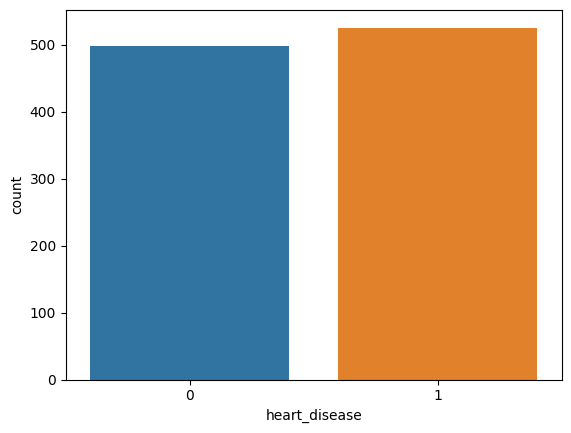

In [29]:
sns.countplot(x="heart_disease", data=df)
plt.show()

In [30]:
# There are 523 heart disease and 495 No heart disease patients. It indicate if a person visit to a
# hospital just with a symptoms,  50% chances are there that he is a patient of heart disease.
# overall its a balanced dataset .

In [31]:
df["rest_cp"].value_counts()

0    497
2    284
1    167
3     77
Name: rest_cp, dtype: int64

In [32]:
# ‘rest_cp’……..Chest pain type
# ………… 0 = Typical angina
# ………… 1 = Atypical angina
# ………… 2 = Non-anginal pain
# ………… 3 = Asymptomatic

In [33]:
df["fast_bloodsugar"].value_counts()

0    872
1    153
Name: fast_bloodsugar, dtype: int64

In [34]:
# ‘fast_bloodsugar’…….(Fasting blood sugar > 120 mg/dl) (1 = true; 0 = false)

In [35]:
# Insight 4: we see very high frequency of patients(872) who dont have fast blood sugar more than 120mg/dl

In [36]:
#‘rest_bp’..Resting blood pressure (in mm Hg on admission to the hospital)

In [37]:
df["rest_ecg"].value_counts()

1    513
0    497
2     15
Name: rest_ecg, dtype: int64

In [38]:
# ‘rest_ecg’…Resting electrocardiographic results
# ………… 0 = Normal
# ………… 1 = Having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV)
# ………… 2 = Showing probable or definite left ventricular hypertrophy by Estes’ criteria

In [39]:
# Insight 5: we see very low frequency of patients(15) who are Showing probable or definite left
# ventricular hypertrophy by Estes’ criteria.

In [40]:
#‘stress_HR’…Maximum heart rate achieved during stress test

In [41]:
df["Exercise_cp"].value_counts()

0    680
1    345
Name: Exercise_cp, dtype: int64

In [42]:
#‘Exercise_cp’…..Exercise induced angina (1 = yes; 0 = no)

In [43]:
#‘STdepression_Exerc’…ST depression induced by exercise relative to rest

In [44]:
df["STpeak_exerc"].value_counts()

1    482
2    469
0     74
Name: STpeak_exerc, dtype: int64

In [45]:
# ‘STpeak_exerc’…..Slope of the peak exercise ST segment
# ………… 0 = upsloping; 1 = flat; 2 = downsloping

In [46]:
# Insight 6: here we see that very low number of patients have Slope of the peak exercise ST segment
# as upsloping.

In [47]:
df["coloured_vessels"].value_counts()

0    578
1    226
2    134
3     69
4     18
Name: coloured_vessels, dtype: int64

In [48]:
# ‘coloured_vessels’………Number of major vessels (0-3) found colored by flourosopy measurement

In [49]:
df["thalassmia"].value_counts()

2    544
3    410
1     64
0      7
Name: thalassmia, dtype: int64

In [50]:
#‘thalassmia’…….0 = null;1=normal; 2 = fixed defect; 3 = reversable defect

In [51]:
# deleting the rows where thalassmia==0 as it is mentioned as null which has no meaning
df = df[(df['thalassmia'] > 0)]

In [52]:
df["thalassmia"].value_counts()

2    544
3    410
1     64
Name: thalassmia, dtype: int64

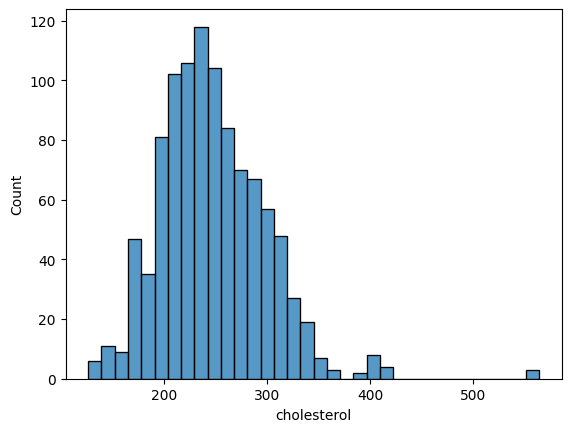

In [53]:
sns.histplot(df["cholesterol"])
plt.show()

In [54]:
# Total cholesterol
# LDL — ‘bad cholesterol”
# HDL — ‘good cholesterol”
# In adults, the total cholesterol levels are considered desirable less than 200 milligram per decilitre ( mg / dL). 
# Borderlines are considered

In [55]:
# Insight 7: we see an outlier in our data as of now we do not do anything about it if required we can remove
# it later.

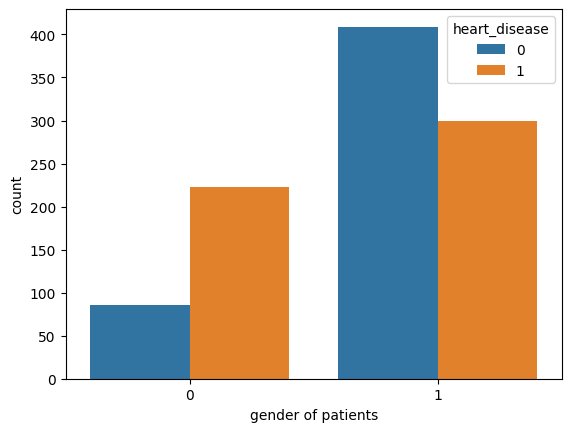

In [56]:
gender_count=sns.countplot(x="gender", data=df,hue="heart_disease")
gender_count.set(xlabel="gender of patients")
plt.show()

In [57]:
# No. of Males =709
# No. of female=309

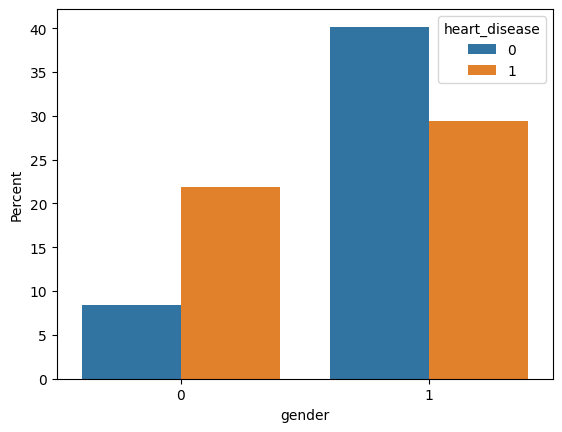

In [58]:
ax = sns.barplot(x="gender", y="heart_disease", data=df,hue="heart_disease", estimator=lambda x: len(x) / len(df) * 100)
ax.set(ylabel="Percent")
plt.show()

In [59]:
# Insight 8: female mostly has less chances of heart disease as compare to male.

In [60]:
# condition (target) : 0 = no disease, 1 = disease
#sex  (0 = female, 1 = male )

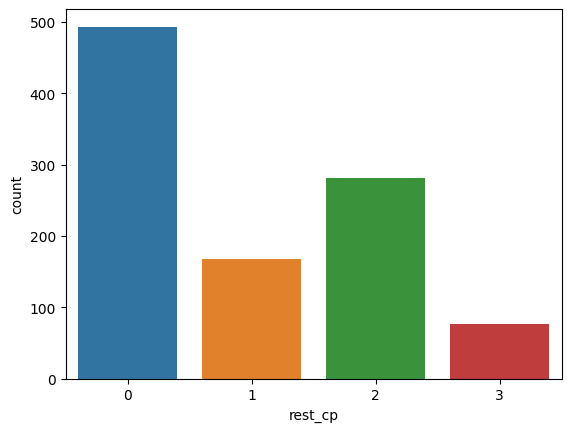

In [61]:
sns.countplot(x="rest_cp", data=df)
plt.show()

In [62]:
# CP:- chest pain type (4 values) 
#   – Value 0: typical angina
#   – Value 1: atypical angina
#   – Value 2: non-anginal pain 
#   – Value 3: asymptomatic"""

# Typical angina means that the history of the patient is classical and chance of having coronary artery blockages is high. 

# Atypical angina means that the symptoms have some features suggesting blockages and other symptoms
# which are not specific and chance of blockages is lower.

# "silent" (asymptomatic) myocardial ischemia is the most common manifestation of coronary heart
# disease (CHD)

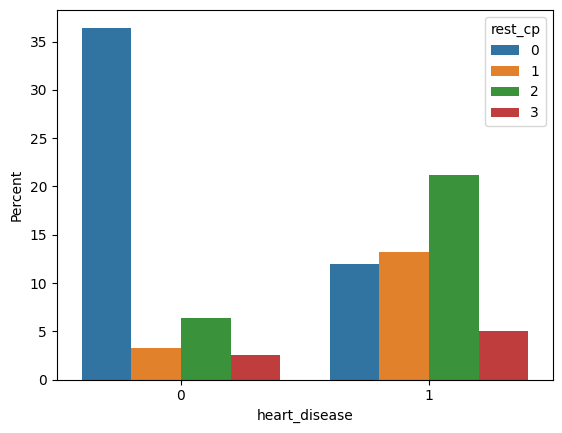

In [63]:
# lets check the heart pain with respect to heart disease.
ax = sns.barplot(x="heart_disease", y="rest_cp", data=df,hue="rest_cp", estimator=lambda x: len(x) / len(df) * 100)
ax.set(ylabel="Percent")
plt.show()

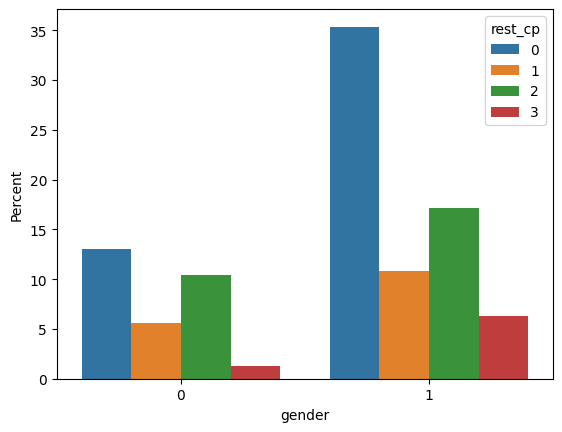

In [64]:
# lets check the gender with respect to heart disease.
ax = sns.barplot(x="gender", y="rest_cp", data=df,hue="rest_cp", estimator=lambda x: len(x) / len(df) * 100)
ax.set(ylabel="Percent")
plt.show()

In [65]:
df["gender"].value_counts()

1    709
0    309
Name: gender, dtype: int64

In [66]:
# sex  (0 = female, 1 = male )
# condition (target) : 0 = no disease, 1 = disease

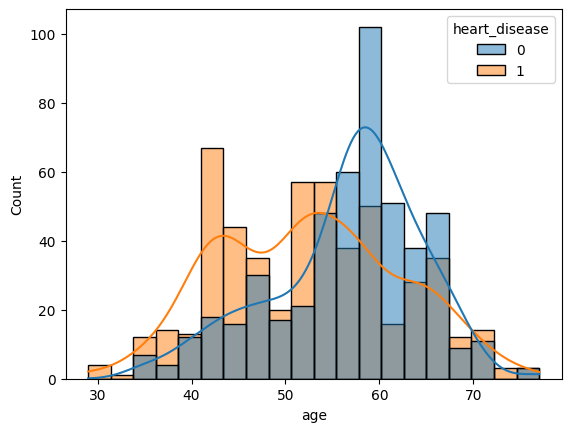

In [67]:
# now lets check the distribution of age for heart disease.
sns.histplot(data=df,x="age",hue="heart_disease",bins=20,kde=True)
plt.show()

In [68]:
# condition (target) : 0 = no disease, 1 = disease

In [69]:
# Insight 9: We can say that Cardiovascular diseases maximum risk is at age 40-65.

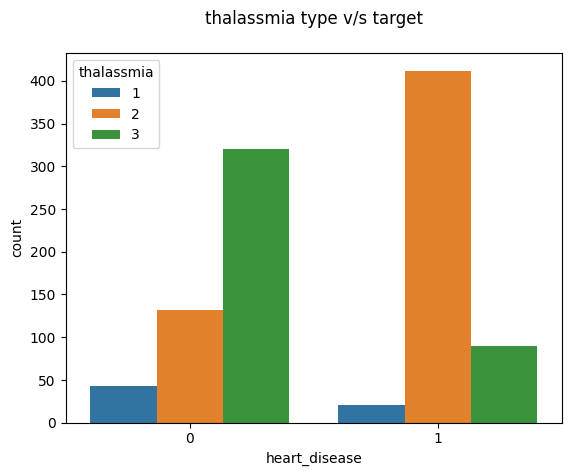

In [70]:
# lets check the thalassmia for heart disease
sns.countplot(data= df, x='heart_disease',hue='thalassmia')
plt.title('thalassmia type v/s target\n')
plt.show()

In [71]:
# condition (target) : 0 = no disease, 1 = disease

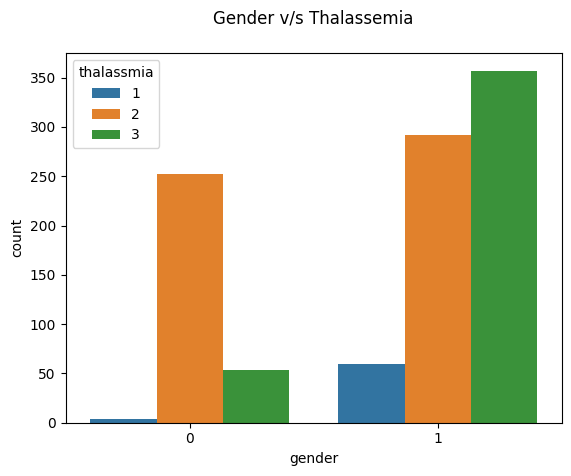

In [72]:
# checking thalassemia with heart disease
sns.countplot(data= df, x='gender',hue='thalassmia')
plt.title('Gender v/s Thalassemia\n')
plt.show()

In [73]:
# Thalassemia (thal-uh-SEE-me-uh) is an inherited blood disorder that causes your body to have less
# hemoglobin than normal. Hemoglobin enables red blood cells to carry oxygen

# The Beta thalassemia cardiomyopathy is mainly characterized by two distinct pheno types, dilated
# type, with left ventricular dilatation and impaired contractility and a restrictive pheno type, with
# restrictive left ventricular feeling , pulmonary hyper tension and right heart failure. Heart
# problems, congestive heart failures and abnormal heart rhythms can be associated with severe
# thalassemia.

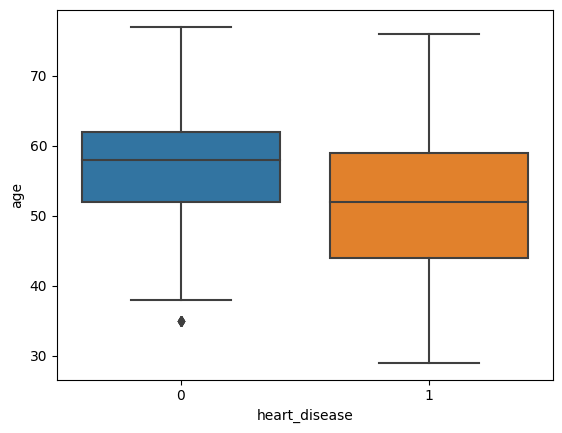

In [74]:
# lets check the boxplot distribution of age with respect to heart disease
sns.boxplot(data=df,x='heart_disease',y='age')
plt.show()

In [75]:
# Insight 10:
# From the positive disease , we can analyze that our 25th Percentile is 44 year i.e  which means 25%
# of the patient age  is less than 44 year. 50th percentile is 50 year,50% of heart disease patients
# lies below 50 year. 75th Percentile value is 58 meaning 75% of data lies below 58.

# Data Preprocessing 

In [76]:
# OUTLIER TREATMENT  

In [77]:
# ALTHOUGH ITS A CLASSIFICATION PROBLEM OUTLIER TREATMENT IS NOT REQUIRED FOR TREE BASED ALGORITHM BUT IN KNN,SVM,ITS NEEDED.
# OUTLIERS HAVE HIGH IMPACT IN REGRESSION PROBLEM. It is not always a good idea to remove the data by
# outlier treatment, sometimes its better to do square root , or log transformation in place of removing outliers.
# instead of removing outlier and then doing feature scalling , better idea is to do feature scaling directly.
# because after feature scaling many outliers aumatically come in to the range.

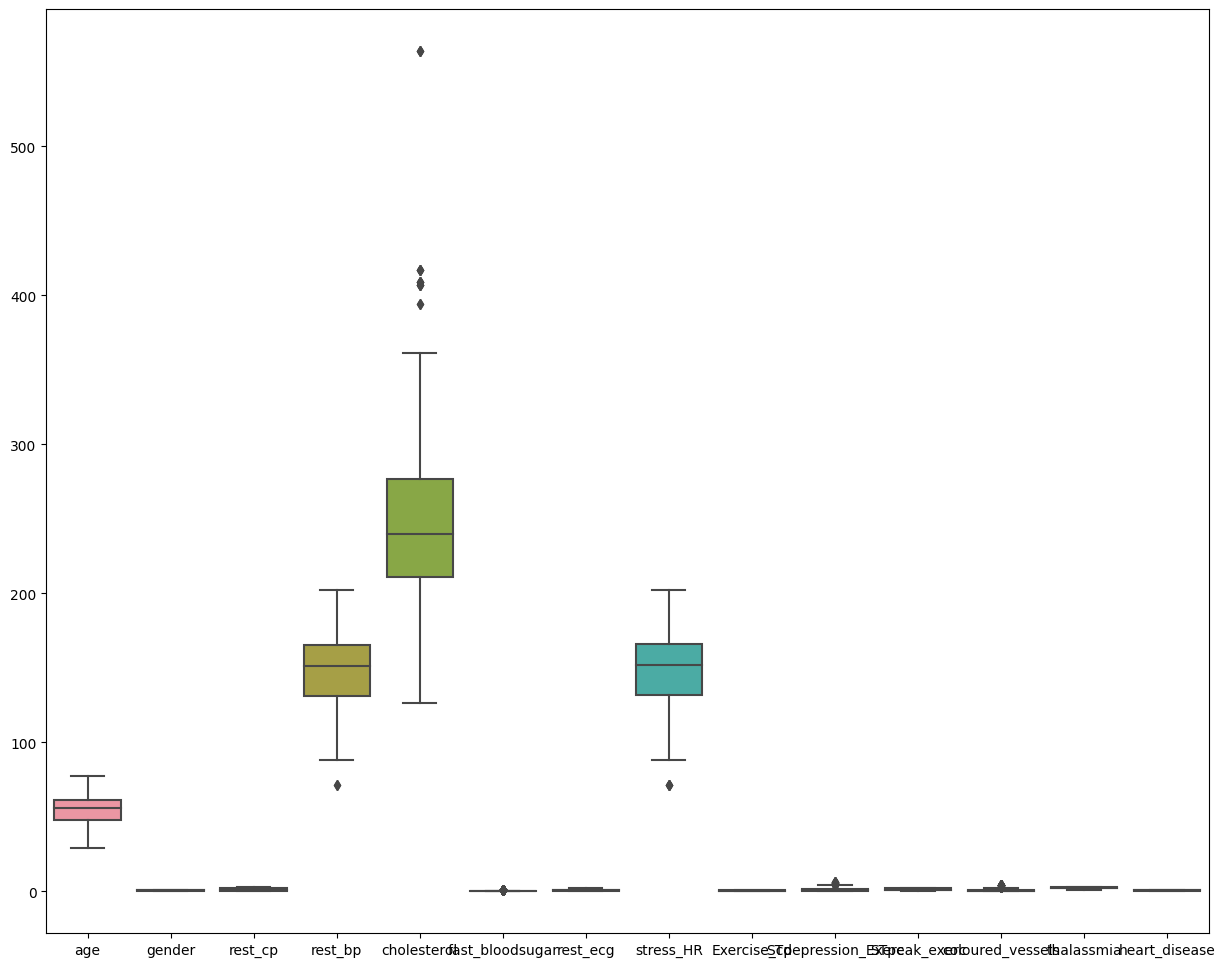

In [78]:
# checking outliers using boxplot
plt.figure(figsize=(15,12)) # Set plot dimensions
sns.boxplot(data=df)
plt.show()

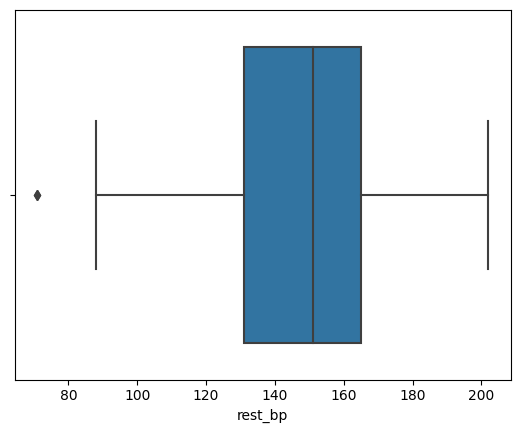

In [79]:
sns.boxplot(x="rest_bp",data=df)
plt.show()

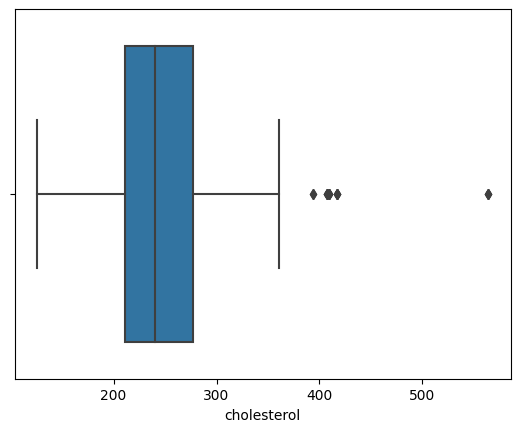

In [80]:
sns.boxplot(x="cholesterol",data=df)
plt.show()

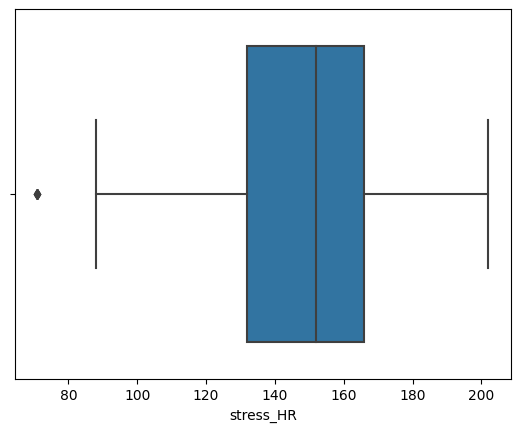

In [81]:
sns.boxplot(x="stress_HR",data=df)
plt.show()

In [82]:
# here we see the data has outliers which we shall not remove as the data is quite sensitive as a
# matter of fact we should do anything with it as the data is of healthcare sector which is very
# sensitive but for the sake of handling the outliers lets cap the outliers.

In [83]:
# Capping the outliers - adjustment of outliers

In [84]:
# rest bp outliers.
Q1_rest_bp=df["rest_bp"].quantile(0.25)
Q3_rest_bp=df["rest_bp"].quantile(0.75)
IQR1=Q3_rest_bp-Q1_rest_bp

upper_limit_rest_bp=(Q3_rest_bp+1.5*IQR1)
print("upper_limit_rest_bp",upper_limit_rest_bp)

lower_limit_rest_bp=(Q1_rest_bp-1.5*IQR1)
print("lower_limit_rest_bp",lower_limit_rest_bp)

upper_limit_rest_bp 216.0
lower_limit_rest_bp 80.0


In [85]:
# cholestrol outliers
Q1_cholesterol=df["cholesterol"].quantile(0.25)
Q3_cholesterol=df["cholesterol"].quantile(0.75)
IQR2=Q3_cholesterol-Q1_cholesterol

upper_limit_cholesterol=(Q3_cholesterol+1.5*IQR2)
print("upper_limit_cholesterol",upper_limit_cholesterol)

lower_limit_cholesterol=(Q1_cholesterol-1.5*IQR2)
print("lower_limit_cholesterol",lower_limit_cholesterol)

upper_limit_cholesterol 376.0
lower_limit_cholesterol 112.0


In [86]:
# stress hr outliers
Q1_stress_HR=df["stress_HR"].quantile(0.25)
Q3_stress_HR=df["stress_HR"].quantile(0.75)
IQR3=Q3_stress_HR-Q1_stress_HR

upper_limit_stress_HR=(Q3_stress_HR+1.5*IQR3)
print("upper_limit_stress_HR",upper_limit_stress_HR)

lower_limit_stress_HR=(Q1_stress_HR-1.5*IQR3)
print("lower_limit_stress_HR",lower_limit_stress_HR)

upper_limit_stress_HR 217.0
lower_limit_stress_HR 81.0


In [87]:
# capping the outliers

In [88]:
df['rest_bp']=np.where(df['rest_bp']>upper_limit_rest_bp,upper_limit_rest_bp,np.where(df['rest_bp']<lower_limit_rest_bp,lower_limit_rest_bp,df['rest_bp']))

In [89]:
df['cholesterol']=np.where(df['cholesterol']>upper_limit_cholesterol,upper_limit_cholesterol,np.where(df['cholesterol']<lower_limit_cholesterol,lower_limit_cholesterol,df['cholesterol']))

In [90]:
df['stress_HR']=np.where(df['stress_HR']>upper_limit_stress_HR,upper_limit_stress_HR,np.where(df['stress_HR']<lower_limit_stress_HR,lower_limit_stress_HR,df['stress_HR']))

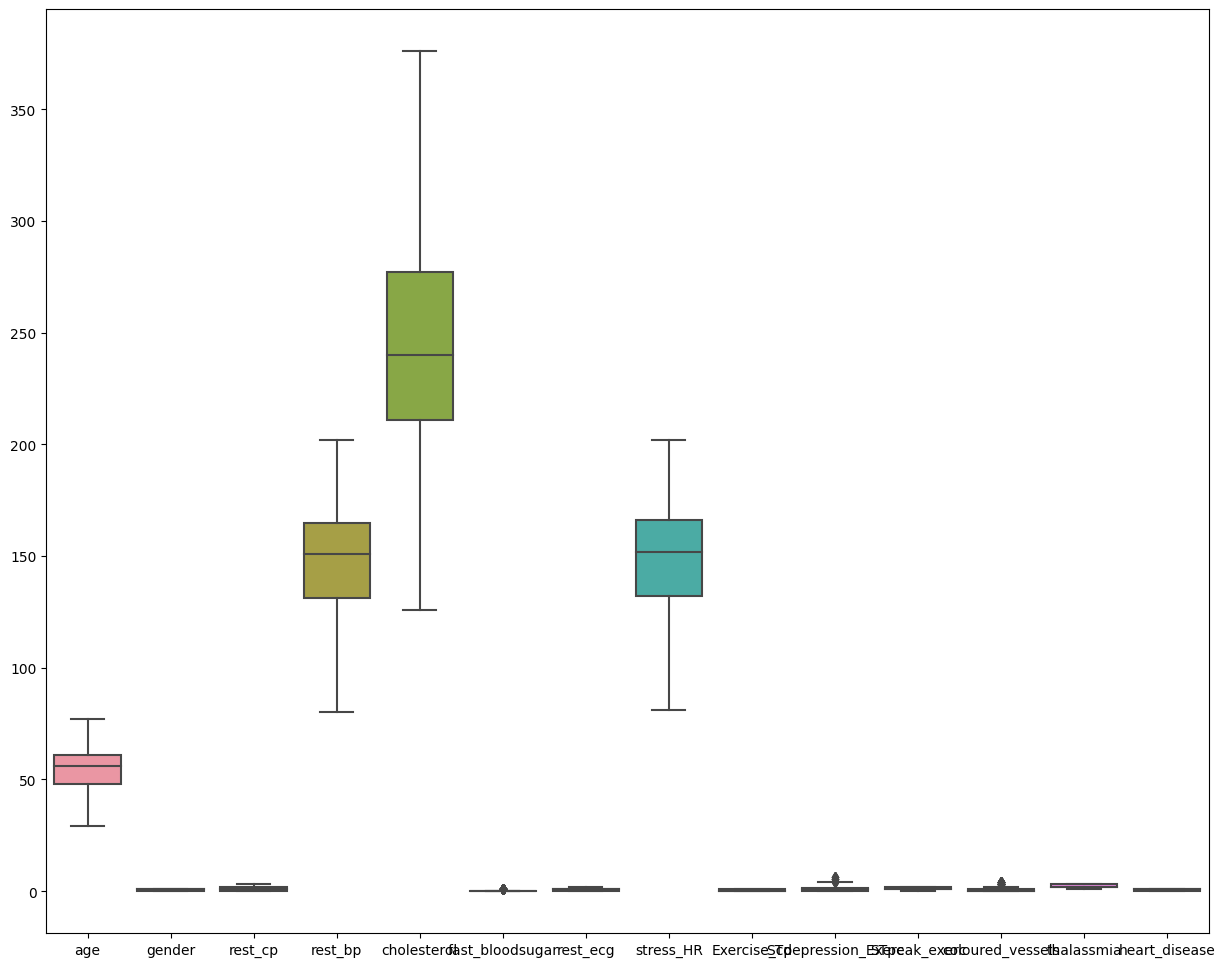

In [91]:
plt.figure(figsize=(15,12)) # Set plot dimensions
sns.boxplot(data=df)
plt.show()

In [92]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1018 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   age                 1018 non-null   int64  
 1   gender              1018 non-null   int64  
 2   rest_cp             1018 non-null   int64  
 3   rest_bp             1018 non-null   float64
 4   cholesterol         1018 non-null   float64
 5   fast_bloodsugar     1018 non-null   int64  
 6   rest_ecg            1018 non-null   int64  
 7   stress_HR           1018 non-null   float64
 8   Exercise_cp         1018 non-null   int64  
 9   STdepression_Exerc  1018 non-null   float64
 10  STpeak_exerc        1018 non-null   int64  
 11  coloured_vessels    1018 non-null   int64  
 12  thalassmia          1018 non-null   int64  
 13  heart_disease       1018 non-null   int64  
dtypes: float64(4), int64(10)
memory usage: 119.3 KB


In [93]:
# as we can see no rows were deleted, and still adjusted the outliers.

# Preprocessing for Modelling

In [94]:
# Splitting the data into independent variable and dependent variable.
# the target variable is heart_disease.

In [95]:
X=df.drop(["heart_disease"],axis=1)
Y=df["heart_disease"]

In [96]:
# Feature Selection
# 1. Univariate Selction — Statistical tests may be used to pick certain features that have the best
# relationship with the performance variable.
# The scikit-learn library provides the SelectKBest class that can be used to select a specific number
# of features in a suite of different statistical tests.
# Here we are using the chi-squared (chi2) statistical test for non-negative features to select 12 of
# the best features from the Dataset.

In [97]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

In [98]:
#apply SelectKBest class to extract top best features
bestfeatures = SelectKBest(score_func=chi2, k=13)
fit = bestfeatures.fit(X,Y)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X.columns)

#concatenating the series for better visualization
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Features','Score'] #naming the dataframe columns
print(featureScores.nlargest(12,'Score')) #print best features

              Features       Score
7            stress_HR  664.205058
2              rest_cp  212.596564
11    coloured_vessels  211.579464
9   STdepression_Exerc  182.230606
4          cholesterol  163.984058
8          Exercise_cp  127.433299
0                  age   80.896419
10        STpeak_exerc   32.875097
1               gender   23.307481
12          thalassmia   19.877974
6             rest_ecg   10.773657
5      fast_bloodsugar    0.827275


In [99]:
# we see here that stress hr feature is highly significant
# we can use other feature importance algorithms as well.

In [100]:
# lets check for multicollinearity.

In [101]:
# Actually, we are doing classification so no need to get rid of collinear variables. 
# Multicollinearity mostly occurs in a regression model when two or more independent variable are
# highly correlated to each other.

# Multicollinearity is a statistical concept where several independent variables in a model are correlated. 
# Two variables are considered to be perfectly collinear if their correlation coefficient is +/- 1.0. 
# Multicollinearity among independent variables will result in less reliable statistical inferences.

In [102]:
X.corr() # it shows how much independent variables are correlated to each other

,age,gender,rest_cp,rest_bp,cholesterol,fast_bloodsugar,rest_ecg,stress_HR,Exercise_cp,STdepression_Exerc,STpeak_exerc,coloured_vessels,thalassmia
age,1.000000,-0.105625,-0.071021,0.029360,0.215989,0.123966,-0.134062,-0.390462,0.087991,0.166307,-0.169234,0.269226,0.070125
gender,-0.105625,1.000000,-0.034464,0.010332,-0.184717,0.019504,-0.062310,-0.053390,0.133562,0.062477,-0.020783,0.111042,0.202289
rest_cp,-0.071021,-0.034464,1.000000,-0.004141,-0.099646,0.090412,0.050097,0.314649,-0.397442,-0.142009,0.127094,-0.177516,-0.174645
rest_bp,0.029360,0.010332,-0.004141,1.000000,-0.009109,0.007530,0.050696,-0.019173,0.054477,0.001254,-0.011708,0.015776,0.032349
cholesterol,0.215989,-0.184717,-0.099646,-0.009109,1.000000,0.037667,-0.143277,-0.042448,0.089132,0.067212,-0.028617,0.079610,0.089182
fast_bloodsugar,0.123966,0.019504,0.090412,0.007530,0.037667,1.000000,-0.115258,-0.012697,0.035855,0.019020,-0.055631,0.145048,-0.012411
rest_ecg,-0.134062,-0.062310,0.050097,0.050696,-0.143277,-0.115258,1.000000,0.047699,-0.073141,-0.058279,0.091662,-0.078055,-0.019490
stress_HR,-0.390462,-0.053390,0.314649,-0.019173,-0.042448,-0.012697,0.047699,1.000000,-0.391508,-0.295935,0.402772,-0.212058,-0.112677
Exercise_cp,0.087991,0.133562,-0.397442,0.054477,0.089132,0.035855,-0.073141,-0.391508,1.000000,0.234708,-0.263637,0.111065,0.221954
STdepression_Exerc,0.166307,0.062477,-0.142009,0.001254,0.067212,0.019020,-0.058279,-0.295935,0.234708,1.000000,-0.445216,0.179592,0.166511


In [103]:
# Correlation Matrix with Heatmap — Correlation indicates how the features are related to each other
# or to the target variable.

# The correlation may be positive (increase in one value of the feature increases the value of the
# target variable) or negative (increase in one value of the feature decreases the value of the target variable)

# Heatmap makes it easy to classify the features are most relevant to the target variable, and we
# will plot the associated features of the heatmap using the seaborn library.

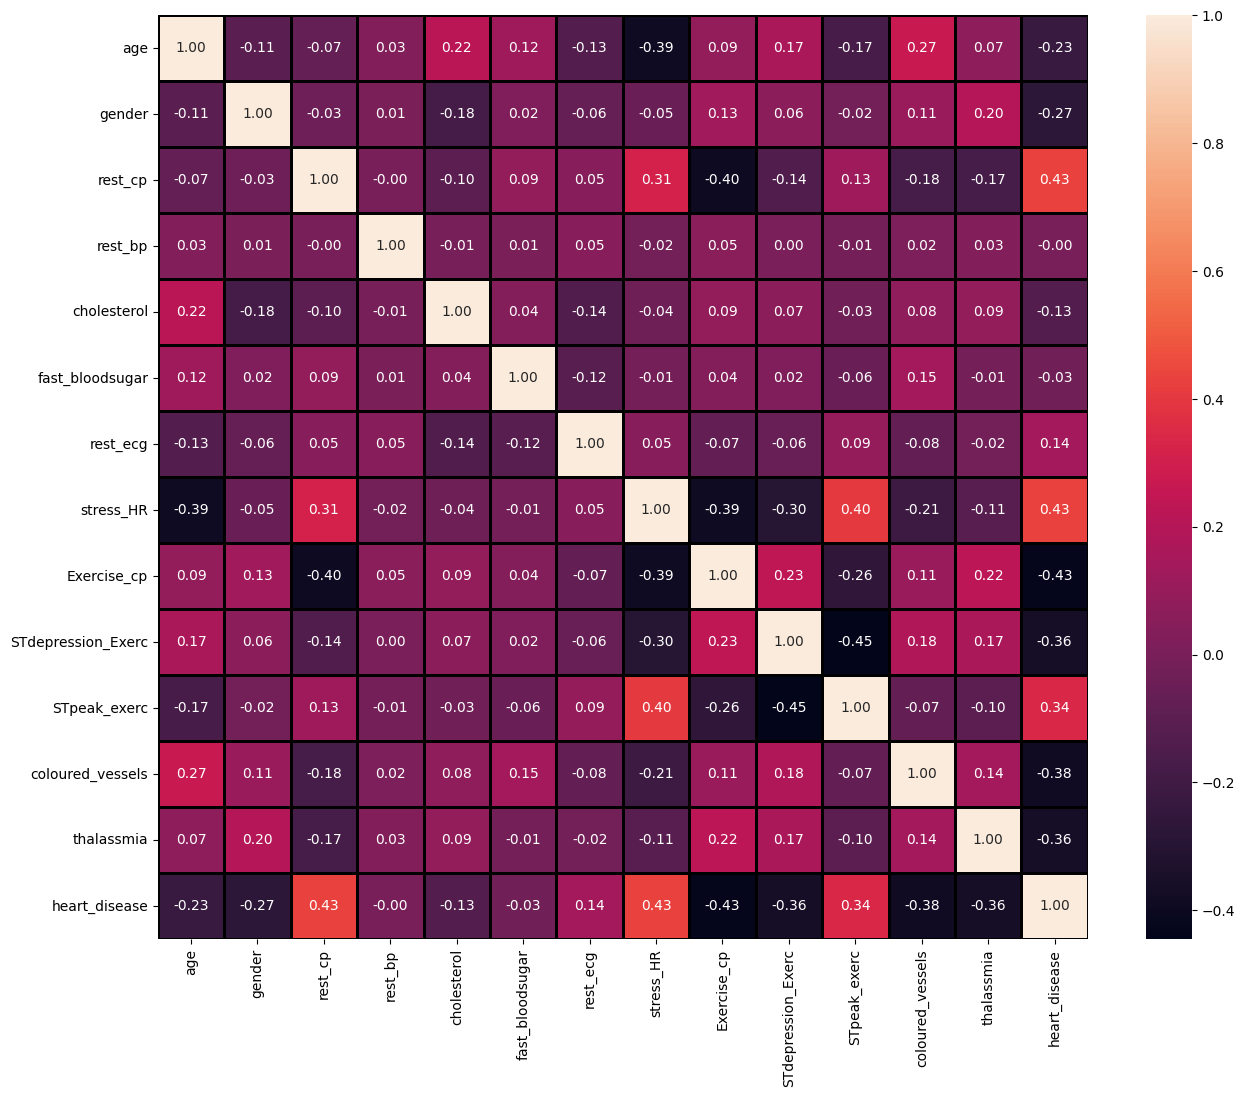

In [104]:
#Same data we can plot in heatmap for more better understanding.
plt.figure(figsize=(15,12))
sns.heatmap(df.corr(),annot=True,fmt="0.2f",linecolor="black",linewidth=1)
plt.show()

In [105]:
# From this heatmap we can observe that the ‘resting_cp’ resting chest pain and stress Heart rate are
# highly related to the target variable. 
# Compared to relation between other variables we can say that resting chest pain and stress Heart rate
# contributes the most in prediction of presences of a heart disease.

In [106]:
print(X.shape)
print(Y.shape)

(1018, 13)
(1018,)


In [107]:
#SPLITTING THE DATA IN TRAINING AND TEST
from sklearn.model_selection import train_test_split
X_train1, X_test1,Y_train1,Y_test1=train_test_split(X,Y,train_size=0.70,random_state=101)
print(X_train1.shape)
print(X_test1.shape)
print(Y_train1.shape)
print(Y_test1.shape)

(712, 13)
(306, 13)
(712,)
(306,)


In [108]:
# lets move on to feature scaling

In [109]:
# Feature scaling is one of the most important data preprocessing step in machine learning. 
# Algorithms that compute the distance between the features are biased towards numerically larger values
# if the data is not scaled.
# Tree-based algorithms are fairly insensitive to the scale of the features.
# Normalization is useful when there are no outliers as it cannot cope up with them. otherwise its
# better to opt for standarization.

In [110]:
# here we opt for standardization.

In [111]:
from sklearn.preprocessing import StandardScaler
scaljob=StandardScaler()
X_train1=scaljob.fit_transform(X_train1)
X_test1=scaljob.fit_transform(X_test1)

# Modelling

In [112]:
# KNN MODEL

In [113]:
# The k-nearest neighbours algorithm is one of the transperent 
# machine learning algorithms. It is simply based on the idea that 
# “objects that are ‘near’ each other will also have similar 
# characteristics. Thus if you know the characteristic features of 
# one of the objects, you can also predict it for its nearest 
# neighbour
 
# It’s used in many different areas, such as Medical, clinical,handwriting detection, image recognition
# and video recognition. 
# KNN is most useful when labeled data is too expensive or impossible to obtain.
# KNN algorithm is one of the simplest forms and is widely used in classification tasks in research
# because of easy-to-understand design.

In [114]:
from sklearn.neighbors import KNeighborsClassifier
knn_S_5=KNeighborsClassifier(n_neighbors=5)
knn_S_5.fit(X_train1,Y_train1)

Y_pred_KNN_train1=knn_S_5.predict(X_train1)
Y_pred_KNN_test1=knn_S_5.predict(X_test1)

In [115]:
print("KNN training accuracy:", accuracy_score(Y_train1,Y_pred_KNN_train1))
print()
print("KNN testing accuracy:", accuracy_score(Y_test1,Y_pred_KNN_test1))

KNN training accuracy: 0.9241573033707865

KNN testing accuracy: 0.8496732026143791


In [116]:
# Let's find the more effective value of n_neighbors parameter.
# There are no pre-defined statistical methods to find the most favourable value of K. 
# Choosing a very small value of K leads to unstable decision boundaries.
# Value of K can be selected as k = sqrt(n). where n = number of data points in training data 
# Odd number is preferred as K value.
# we can calculate effective k value by accuracy score also

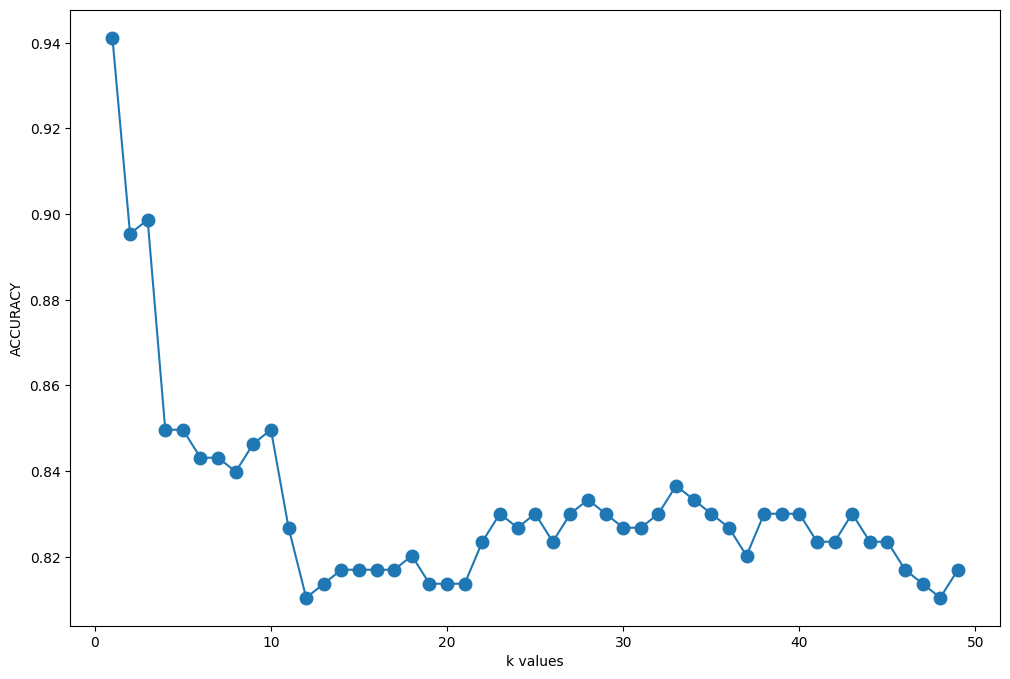

In [117]:
# find the more effective value of n_neighbors parameter:
accuracy_K = []
for k in range(1, 50):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train1, Y_train1)
    Y_pred = knn.predict(X_test1)
    accuracy =accuracy_score(Y_test1, Y_pred)
    accuracy_K.append(accuracy)
   
plt.figure(figsize=(12,8))
plt.xlabel("k values")
plt.ylabel("ACCURACY")
plt.plot(range(1,50),accuracy_K, marker='o', markersize=9)
plt.show()

In [118]:
# we can try different k values such as 10.
knn_S_10=KNeighborsClassifier(n_neighbors=10) 
knn_S_10.fit(X_train1,Y_train1)


Y_pred_KNN_train1=knn_S_10.predict(X_train1)
Y_pred_KNN_test1=knn_S_10.predict(X_test1)

In [119]:
print("KNN training accuracy", accuracy_score(Y_train1,Y_pred_KNN_train1))
print()
print("KNN testing accuracy", accuracy_score(Y_test1,Y_pred_KNN_test1))

KNN training accuracy 0.8862359550561798

KNN testing accuracy 0.8496732026143791


In [120]:
# but we see 5 give better results so we stick with 5.

In [121]:
# CROSS VALIDATION CV

In [122]:
from sklearn.model_selection import cross_val_score

In [123]:
# using k-fold cross validation.
accuracy_training=cross_val_score(knn_S_5,X_train1,Y_train1,cv=20)
accuracy_testing=cross_val_score(knn_S_5,X_test1,Y_test1,cv=20)
print("Training accuracy", accuracy_training)
print()
print("Testing_accuracy",accuracy_testing)

Training accuracy [0.91666667 0.80555556 0.86111111 0.88888889 0.83333333 0.88888889
 0.80555556 0.86111111 0.94444444 0.91666667 0.97222222 0.91666667
 0.88571429 0.8        0.82857143 0.88571429 0.88571429 0.71428571
 0.85714286 0.85714286]

Testing_accuracy [0.9375     0.8125     0.8125     0.9375     0.9375     0.8125
 0.8        0.8        0.93333333 0.86666667 0.8        0.93333333
 0.93333333 0.53333333 1.         0.86666667 0.73333333 0.73333333
 0.73333333 0.86666667]


In [124]:
print("Average training accuracy:",np.mean(accuracy_training))
print()
print("Average testing accuracy:",np.mean(accuracy_testing))

Average training accuracy: 0.8662698412698413

Average testing accuracy: 0.8391666666666666


In [125]:
# MOSTLY USED IN KAGGLE COMPETITION TO INCREASE THE ACCURACY, it is one kind of hacking technique.
# Not appreciated in sensitive and high risk prediction industry like medical , airlines,railways etc..
# The three steps involved in cross-validation are as follows :
# Reserve some portion of sample data-set.
# Using rest of the data-set train the model.
# Test the model using the reserved portion of the data-set.

In [126]:
# Accuracy is the standard metric to go for to evaluate a classification machine learning model.
# But We cannot only rely on Accuracy all the time as in some cases accuracy gives us a wrong
# interpretation of the quality of the model.

# Example : Medical diagnosis , lab report.

# TRUE POSITIVE(TP):-THE NO. OF CASES CORRECTLY IDENTIFIES AS PATIENT.
# FALSE POSITIVE(FP):-THE NO. OF CASES INCORRECTLY IDENTIFIES AS PATIENT.

# FALSE NEGATIVE(FN):-THE NO. OF CASES INCORRECTLY IDENTIFIES AS HEALTHY.
# TRUE NEGATIVE(TN):-THE NO. OF CASES CORRECTLY IDENTIFIES AS HEALTHY.

# In some cases of imbalanced data problems, both Precision and Recall are important so we consider
# the F1 score as an evaluation metric.

# There is another concept of the AUC ROC curve for evaluation of a classification model, which is one
# of the most important metrics also.

In [127]:
# confusion matrix

# Confusion matrix got its name from the fact that it makes it easier to identify if the classification model is getting 
# confused or not. For a classification model, confusion can result in misidentifying the data, which further results in 
# performance degradation.

# When a Machine Learning model is built various evaluation metrics are used to check the quality or the performance of a
# model. For classification models, metrics such as Accuracy, Confusion Matrix, Classification report (i.e Precision, Recall, F1
# score), and AUC-ROC curve are used.

from sklearn.metrics import classification_report,confusion_matrix,accuracy_score
knn_conf_mat=confusion_matrix(Y_test1,Y_pred_KNN_test1)

In [128]:
print(knn_conf_mat)

[[128  20]
 [ 26 132]]


In [129]:
TP = knn_conf_mat[0][0]
FP = knn_conf_mat[0][1]
FN = knn_conf_mat[1][0]
TN = knn_conf_mat[1][1]
                  
print("True positive:",TP)
print("False positive:",FP)
print("False Negative:",FN)               
print("True Negative:",TN)

True positive: 128
False positive: 20
False Negative: 26
True Negative: 132


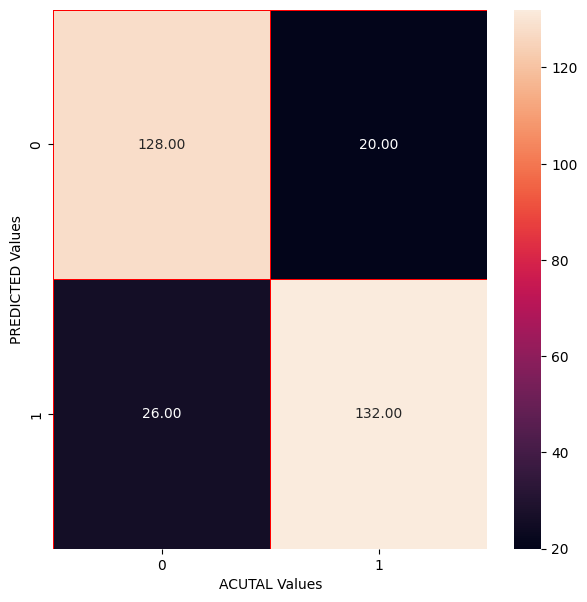

In [130]:
#Visualization Confusion Matrix
plt.subplots(figsize=(7,7))
sns.heatmap(knn_conf_mat,annot=True,linewidths=0.5,linecolor="red",fmt="0.2f")
plt.xlabel("ACUTAL Values")
plt.ylabel("PREDICTED Values")
plt.show()

In [131]:
# True Positive (Top-Left Quadrant)

# False Positive (Top-Right Quadrant)

# False Negative (Bottom-Left Quadrant)

# True Negative (Bottom-Right Quadrant)

# TP: True Positive =128, False Positive(TYPE I ERROR) =20, FN: False Negative(TYPE II ERROR)= 26,
# True Negative : 132

# IMPORTANT:- FALSE POSITIVE IS TYPE I ERROR FALSE NEGATIVE IS TYPE II ERROR.

In [132]:
# Classification Report Basically, it is an extended version of the confusion matrix. 
# There are measures other than the confusion matrix which can help achieve better understanding and
# analysis of our model and its performance.

In [133]:
print("CLASSIFICATION REPORT KNN TRAINING MODEL")
print(classification_report(Y_train1,Y_pred_KNN_train1))
print("CLASSIFICATION REPORT KNN TESTING MODEL")
print(classification_report(Y_test1,Y_pred_KNN_test1))

CLASSIFICATION REPORT KNN TRAINING MODEL
              precision    recall  f1-score   support

           0       0.87      0.90      0.89       347
           1       0.90      0.87      0.89       365

    accuracy                           0.89       712
   macro avg       0.89      0.89      0.89       712
weighted avg       0.89      0.89      0.89       712

CLASSIFICATION REPORT KNN TESTING MODEL
              precision    recall  f1-score   support

           0       0.83      0.86      0.85       148
           1       0.87      0.84      0.85       158

    accuracy                           0.85       306
   macro avg       0.85      0.85      0.85       306
weighted avg       0.85      0.85      0.85       306



In [134]:
print(accuracy_score(Y_test1,Y_pred_KNN_test1))

0.8496732026143791


In [135]:
"""## condition (target) : 0 = no disease, 1 = disease

#PRECISION REPORT

# Precision is the fraction of true positive examples among the examples that the model classified as
# positive. 
Precision=TP/(TP+FP)
the number of true positives
divided by the number of false positives plus true
positives.

# RECALL/SENSITIVITY
Recall, also known as sensitivity, is the fraction of examples classified as positive, among the total
number of positive examples. 
RECALL FOR 1=TP/(TP+FN)
RECALL FOR 0=TN/(TN+FN)

# F1 SCORE
F1 Score, a metric that is primarily
used to compare the performance of two classifiers, with the confusion matrix
F1=2*Recall*Precision/(Recall+Precision)
The formula for the standard F1-score is the harmonic mean of the precision and recall

# SUPPORT : no. of examples as 0 and 1.

# macro-avg is mean average of precision/recall/F1 of all classes. 
while weighed avg is the total number TP (true positive of all classes)/total number of objects in all classes. """

'## condition (target) : 0 = no disease, 1 = disease\n\n#PRECISION REPORT\n\n# Precision is the fraction of true positive examples among the examples that the model classified as\n# positive. \nPrecision=TP/(TP+FP)\nthe number of true positives\ndivided by the number of false positives plus true\npositives.\n\n# RECALL/SENSITIVITY\nRecall, also known as sensitivity, is the fraction of examples classified as positive, among the total\nnumber of positive examples. \nRECALL FOR 1=TP/(TP+FN)\nRECALL FOR 0=TN/(TN+FN)\n\n# F1 SCORE\nF1 Score, a metric that is primarily\nused to compare the performance of two classifiers, with the confusion matrix\nF1=2*Recall*Precision/(Recall+Precision)\nThe formula for the standard F1-score is the harmonic mean of the precision and recall\n\n# SUPPORT : no. of examples as 0 and 1.\n\n# macro-avg is mean average of precision/recall/F1 of all classes. \nwhile weighed avg is the total number TP (true positive of all classes)/total number of objects in all cla

# KNN ROC AUC PREDICTION

In [136]:
#ROC is a probability curve and AUC represents the degree or measure of separability.
"""The classification done internally on the based on thershold value... similar to DEEP Leaning different activation function.
Assuming a threshold of 0.5 for a model classifier, than the value 0.6,0.7,0.8,0.9 consider as 1. it is misleading.
Assuming a threshold of 0.78 for a model classifier, than the value 0.6,0.7 will not consider as consider as 1."""

"""
TPR (True Positive Rate)
FPR (False Positive Rate)

TPR (True Positive Rate)/Sensitivity/Recall = TP/(TP+FN)

The FPR is the proportion of innocents we incorrectly predicted as criminal (false positives) 
divided by the total number of actual innocent citizens. Thus, the numerator is innocents captured, and the denominator is 
total innocents.

FPR (False Positive Rate) = FP/(TN+FP)

Usually, we want high TPR  and low FPR 

The balanced accuracy, often used when the two classes are imbalanced – that is, one class appears 
much more than the other class.



Balanced ACCURACY=(Recall +Specificity)/2.

Specificity =TNR =TN/(TN+FP)=133/(133+15)=0.8986
Recall = TP/(TP+FN)=133/(133+25)=0.8417
Balanced ACCURACY=(Recall +Specificity)/2=87.1%.

"""

'\nTPR (True Positive Rate)\nFPR (False Positive Rate)\n\nTPR (True Positive Rate)/Sensitivity/Recall = TP/(TP+FN)\n\nThe FPR is the proportion of innocents we incorrectly predicted as criminal (false positives) \ndivided by the total number of actual innocent citizens. Thus, the numerator is innocents captured, and the denominator is \ntotal innocents.\n\nFPR (False Positive Rate) = FP/(TN+FP)\n\nUsually, we want high TPR  and low FPR \n\nThe balanced accuracy, often used when the two classes are imbalanced – that is, one class appears \nmuch more than the other class.\n\n\n\nBalanced ACCURACY=(Recall +Specificity)/2.\n\nSpecificity =TNR =TN/(TN+FP)=133/(133+15)=0.8986\nRecall = TP/(TP+FN)=133/(133+25)=0.8417\nBalanced ACCURACY=(Recall +Specificity)/2=87.1%.\n\n'

In [137]:
Specificity=TN/(TN+FP)
Recall = TP/(TP+FN)
Balanced_ACCURACY=(Recall +Specificity)/2
print("Balanced Accuracy",Balanced_ACCURACY)

Balanced Accuracy 0.8497949419002051


In [138]:
"""
“Area Under the ROC Curve” (AUC) of “Receiver Characteristic Operator” (ROC). 

The higher the AUC, the better the performance of the model at distinguishing between the positive and negative classes.
It is a probability curve that plots the TPR against FPR

When AUC = 1, then the classifier is able to perfectly distinguish between all the Positive and the 
Negative class points correctly. If, however, the AUC had been 0, then the classifier would be predicting all Negatives
as Positives, and all Positives as Negatives.


When AUC=0.5, then the classifier is not able to distinguish between Positive and Negative class points. 
Meaning either the classifier is predicting random class or constant class for all the data points.
So, the higher the AUC value for a classifier, the better its ability to distinguish between positive and negative classes."""


'\n“Area Under the ROC Curve” (AUC) of “Receiver Characteristic Operator” (ROC). \n\nThe higher the AUC, the better the performance of the model at distinguishing between the positive and negative classes.\nIt is a probability curve that plots the TPR against FPR\n\nWhen AUC = 1, then the classifier is able to perfectly distinguish between all the Positive and the \nNegative class points correctly. If, however, the AUC had been 0, then the classifier would be predicting all Negatives\nas Positives, and all Positives as Negatives.\n\n\nWhen AUC=0.5, then the classifier is not able to distinguish between Positive and Negative class points. \nMeaning either the classifier is predicting random class or constant class for all the data points.\nSo, the higher the AUC value for a classifier, the better its ability to distinguish between positive and negative classes.'

In [139]:
from sklearn.metrics import roc_auc_score,roc_curve

# predict probabilities
probability_prediction_positive = knn.predict_proba(X_test1)[:,1]

# auc scores
auc_score1 = roc_auc_score(Y_test1, probability_prediction_positive)

# roc curve for models
fpr1, tpr1, thresh1 = roc_curve(Y_test1, probability_prediction_positive, pos_label=1)

print("AUC SCORE:",auc_score1)
print()
print("value of FPR:", fpr1)
print()
print("Values of TPR:",tpr1)
print()
print("values of Threshold:", thresh1)

AUC SCORE: 0.9121621621621622

value of FPR: [0.         0.         0.         0.00675676 0.02027027 0.02702703
 0.02702703 0.04054054 0.04054054 0.04054054 0.05405405 0.06081081
 0.06081081 0.08108108 0.08108108 0.09459459 0.11486486 0.12162162
 0.14189189 0.16891892 0.17567568 0.19594595 0.21621622 0.22972973
 0.23648649 0.27027027 0.29054054 0.31081081 0.33783784 0.33783784
 0.35810811 0.37837838 0.41891892 0.43918919 0.44594595 0.47972973
 0.50675676 0.56081081 0.57432432 0.58783784 0.64189189 0.68918919
 0.74324324 0.78378378 0.83783784 0.89864865 0.94594595 1.        ]

Values of TPR: [0.         0.06962025 0.20253165 0.24050633 0.29113924 0.36708861
 0.41772152 0.43670886 0.50632911 0.53797468 0.59493671 0.62658228
 0.63924051 0.70253165 0.70886076 0.72151899 0.75949367 0.76582278
 0.79113924 0.8164557  0.83544304 0.84177215 0.84177215 0.86075949
 0.89240506 0.91772152 0.93037975 0.93037975 0.94303797 0.94936709
 0.96202532 0.96835443 0.96835443 0.96835443 0.96835443 0.96835443


In [140]:
roc_df = pd.DataFrame(zip(fpr1, tpr1, thresh1),columns = ["FPR","TPR","Threshold"])
roc_df

,FPR,TPR,Threshold
0,0.000000,0.000000,2.000000
1,0.000000,0.069620,1.000000
2,0.000000,0.202532,0.938776
3,0.006757,0.240506,0.918367
4,0.020270,0.291139,0.897959
5,0.027027,0.367089,0.877551
6,0.027027,0.417722,0.857143
7,0.040541,0.436709,0.836735
8,0.040541,0.506329,0.816327
9,0.040541,0.537975,0.795918


In [141]:
# Plotting the ROC-AUC curve.

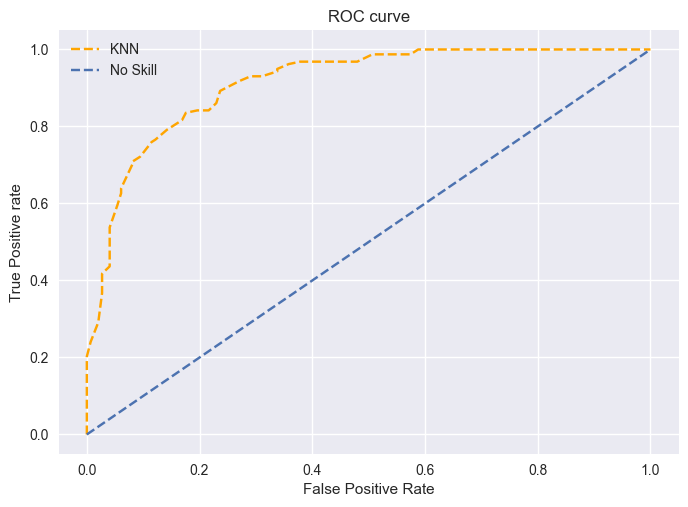

In [142]:
# matplotlib
import matplotlib.pyplot as plt
plt.style.use('seaborn')

# plotting roc curves
plt.plot(fpr1, tpr1, linestyle='--',color='orange', label='KNN')

# plotting no skill roc curve
plt.plot([0, 1], [0, 1], linestyle='--', label='No Skill')

# title
plt.title('ROC curve')

# x label
plt.xlabel('False Positive Rate')
# y label
plt.ylabel('True Positive rate')

plt.legend(loc='best')

plt.savefig('ROC', dpi=300)
plt.show()

# SVM Support Vector Machine Algorithm

In [143]:
# when the feature variables are more than observations SVM work very well.
# In some special important observation few no. of rows but large no. of variables. need SVM to solve it.
# SVM become very famous in 1990 when Deep learning was not that much successfull.
# But the problem with SVM when we have large number of data observation it wont work efficiently it
# as it requires lot of HyperParameter Tuning so the computational time increases a lot.
# Till 2012 SVM was famous. now DEEP learning  has replaced many of the application.

from sklearn.svm import SVC

# Building a Support Vector Machine on train data
svm = SVC(C= .1, kernel='linear', gamma= 1,probability=True)
svm.fit(X_train1, Y_train1)
Y_pred_SVM_train = svm.predict(X_train1)
Y_pred_SVM_test = svm.predict(X_test1)

# check the accuracy on the training set and testing set
print("traing accuracy:",svm.score(X_train1, Y_train1))
print()
print("testing accuracy:",svm.score(X_test1, Y_test1))

traing accuracy: 0.8497191011235955

testing accuracy: 0.8300653594771242


[[117  31]
 [ 21 137]]


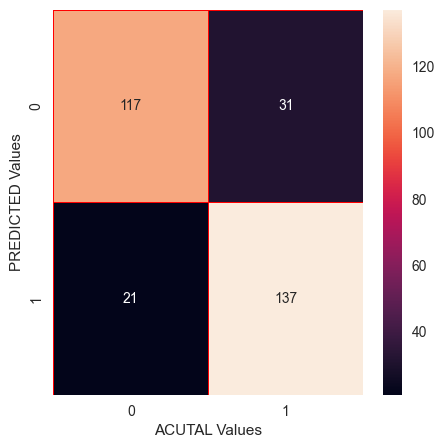

In [144]:
# confusion matrix
SVM_conf_mat=confusion_matrix(Y_test1,Y_pred_SVM_test)
print(confusion_matrix(Y_test1,Y_pred_SVM_test))

#Visualization of Confusion Matrix
plt.subplots(figsize=(5,5))
sns.heatmap(SVM_conf_mat,annot=True,linewidths=0.5,linecolor="red",fmt=".0f")
plt.xlabel("ACUTAL Values")
plt.ylabel("PREDICTED Values")
plt.show()

In [145]:
print("CLASSIFICATION REPORT SVM TRAINING MODEL")
print(classification_report(Y_train1,Y_pred_SVM_train))
print("CLASSIFICATION REPORT SVM TESTING MODEL")
print(classification_report(Y_test1,Y_pred_SVM_test))

CLASSIFICATION REPORT SVM TRAINING MODEL
              precision    recall  f1-score   support

           0       0.88      0.80      0.84       347
           1       0.83      0.90      0.86       365

    accuracy                           0.85       712
   macro avg       0.85      0.85      0.85       712
weighted avg       0.85      0.85      0.85       712

CLASSIFICATION REPORT SVM TESTING MODEL
              precision    recall  f1-score   support

           0       0.85      0.79      0.82       148
           1       0.82      0.87      0.84       158

    accuracy                           0.83       306
   macro avg       0.83      0.83      0.83       306
weighted avg       0.83      0.83      0.83       306



In [146]:
from sklearn.metrics import roc_auc_score

# predict probabilities
probability_prediction_positive_svm = svm.predict_proba(X_test1)[:,1]

# auc scores
auc_score_svm = roc_auc_score(Y_test1, probability_prediction_positive_svm)

from sklearn.metrics import roc_curve

# roc curve for models
fpr2, tpr2, thresh2 = roc_curve(Y_test1, probability_prediction_positive_svm, pos_label=1)


print("AUC SCORE:",auc_score_svm)
print()
print("value of FPR", fpr1)
print()
print("Values of TPR",tpr1)
print()
print("values of Threshold", thresh1)

AUC SCORE: 0.9001453985631203

value of FPR [0.         0.         0.         0.00675676 0.02027027 0.02702703
 0.02702703 0.04054054 0.04054054 0.04054054 0.05405405 0.06081081
 0.06081081 0.08108108 0.08108108 0.09459459 0.11486486 0.12162162
 0.14189189 0.16891892 0.17567568 0.19594595 0.21621622 0.22972973
 0.23648649 0.27027027 0.29054054 0.31081081 0.33783784 0.33783784
 0.35810811 0.37837838 0.41891892 0.43918919 0.44594595 0.47972973
 0.50675676 0.56081081 0.57432432 0.58783784 0.64189189 0.68918919
 0.74324324 0.78378378 0.83783784 0.89864865 0.94594595 1.        ]

Values of TPR [0.         0.06962025 0.20253165 0.24050633 0.29113924 0.36708861
 0.41772152 0.43670886 0.50632911 0.53797468 0.59493671 0.62658228
 0.63924051 0.70253165 0.70886076 0.72151899 0.75949367 0.76582278
 0.79113924 0.8164557  0.83544304 0.84177215 0.84177215 0.86075949
 0.89240506 0.91772152 0.93037975 0.93037975 0.94303797 0.94936709
 0.96202532 0.96835443 0.96835443 0.96835443 0.96835443 0.96835443
 0

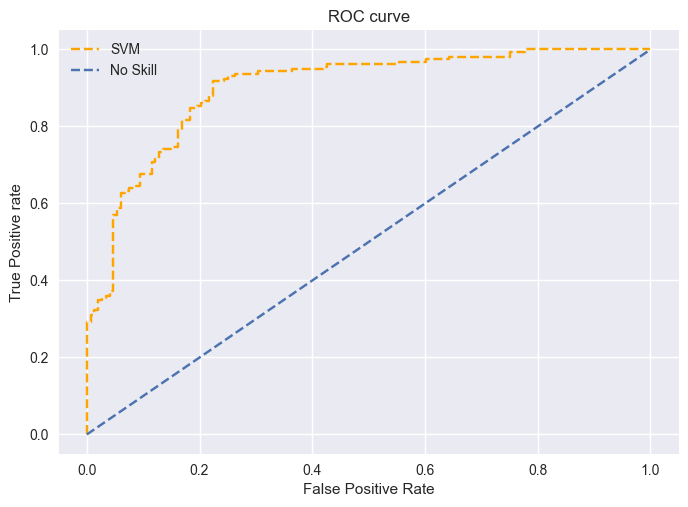

In [147]:
# matplotlib
import matplotlib.pyplot as plt
plt.style.use('seaborn')

# plotting roc curves
plt.plot(fpr2, tpr2, linestyle='--',color='orange', label='SVM')

# plotting no skill roc curve
plt.plot([0, 1], [0, 1], linestyle='--', label='No Skill')

# title
plt.title('ROC curve')

# x label
plt.xlabel('False Positive Rate')
# y label
plt.ylabel('True Positive rate')

plt.legend(loc='best')

plt.savefig('ROC', dpi=300)
plt.show()

# LOGISTIC REGRESSION

In [148]:
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression(max_iter=200)
# by default max_iter=100. there is no much difference in accuracy changing it.
lr.fit(X_train1,Y_train1)

LogisticRegression(max_iter=200)

In [149]:
Y_pred_lr_train=lr.predict(X_train1)
Y_pred_lr_test=lr.predict(X_test1)

In [150]:
print("LOGISTIC REGRESSION TRAINING ACCURACY:",accuracy_score(Y_train1,Y_pred_lr_train))
print()
print("LOGISTIC REGRESSION TESTING ACCURACY:",accuracy_score(Y_test1,Y_pred_lr_test))

LOGISTIC REGRESSION TRAINING ACCURACY: 0.8609550561797753

LOGISTIC REGRESSION TESTING ACCURACY: 0.8235294117647058


[[118  30]
 [ 24 134]]


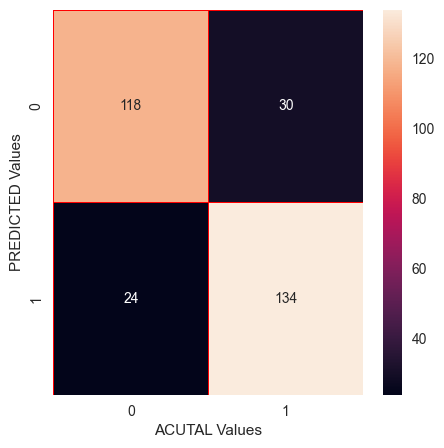

In [151]:
# confusion matrix
lr_conf_mat=confusion_matrix(Y_test1,Y_pred_lr_test)
print(confusion_matrix(Y_test1,Y_pred_lr_test))

#Visualization Confusion Matrix
plt.subplots(figsize=(5,5))
sns.heatmap(lr_conf_mat,annot=True,linewidths=0.5,linecolor="red",fmt=".0f")
plt.xlabel("ACUTAL Values")
plt.ylabel("PREDICTED Values")
plt.show()

In [152]:
print("CLASSIFICATION REPORT OF LOGISTIC REGRESSION TRAINING MODEL")
print(classification_report(Y_train1,Y_pred_lr_train))
print("CLASSIFICATION REPORT OF LOGISTIC REGRESSION TESTING MODEL")
print(classification_report(Y_test1,Y_pred_lr_test))

CLASSIFICATION REPORT OF LOGISTIC REGRESSION TRAINING MODEL
              precision    recall  f1-score   support

           0       0.88      0.83      0.85       347
           1       0.85      0.89      0.87       365

    accuracy                           0.86       712
   macro avg       0.86      0.86      0.86       712
weighted avg       0.86      0.86      0.86       712

CLASSIFICATION REPORT OF LOGISTIC REGRESSION TESTING MODEL
              precision    recall  f1-score   support

           0       0.83      0.80      0.81       148
           1       0.82      0.85      0.83       158

    accuracy                           0.82       306
   macro avg       0.82      0.82      0.82       306
weighted avg       0.82      0.82      0.82       306



# DECISION TREE

In [153]:
from sklearn.tree import DecisionTreeClassifier
dt=DecisionTreeClassifier(criterion="entropy")
dt.fit(X_train1,Y_train1)

DecisionTreeClassifier(criterion='entropy')

In [154]:
Y_pred_dt_train=dt.predict(X_train1)
Y_pred_dt_test=dt.predict(X_test1)

In [155]:
print("DECISION TREE CLASSIFIER TRAINING ACCURACY ",accuracy_score(Y_train1,Y_pred_dt_train))
print()
print("DECISION TREE CLASSIFIER TESTING ACCURACY ",accuracy_score(Y_test1,Y_pred_dt_test))

DECISION TREE CLASSIFIER TRAINING ACCURACY  1.0

DECISION TREE CLASSIFIER TESTING ACCURACY  0.9019607843137255


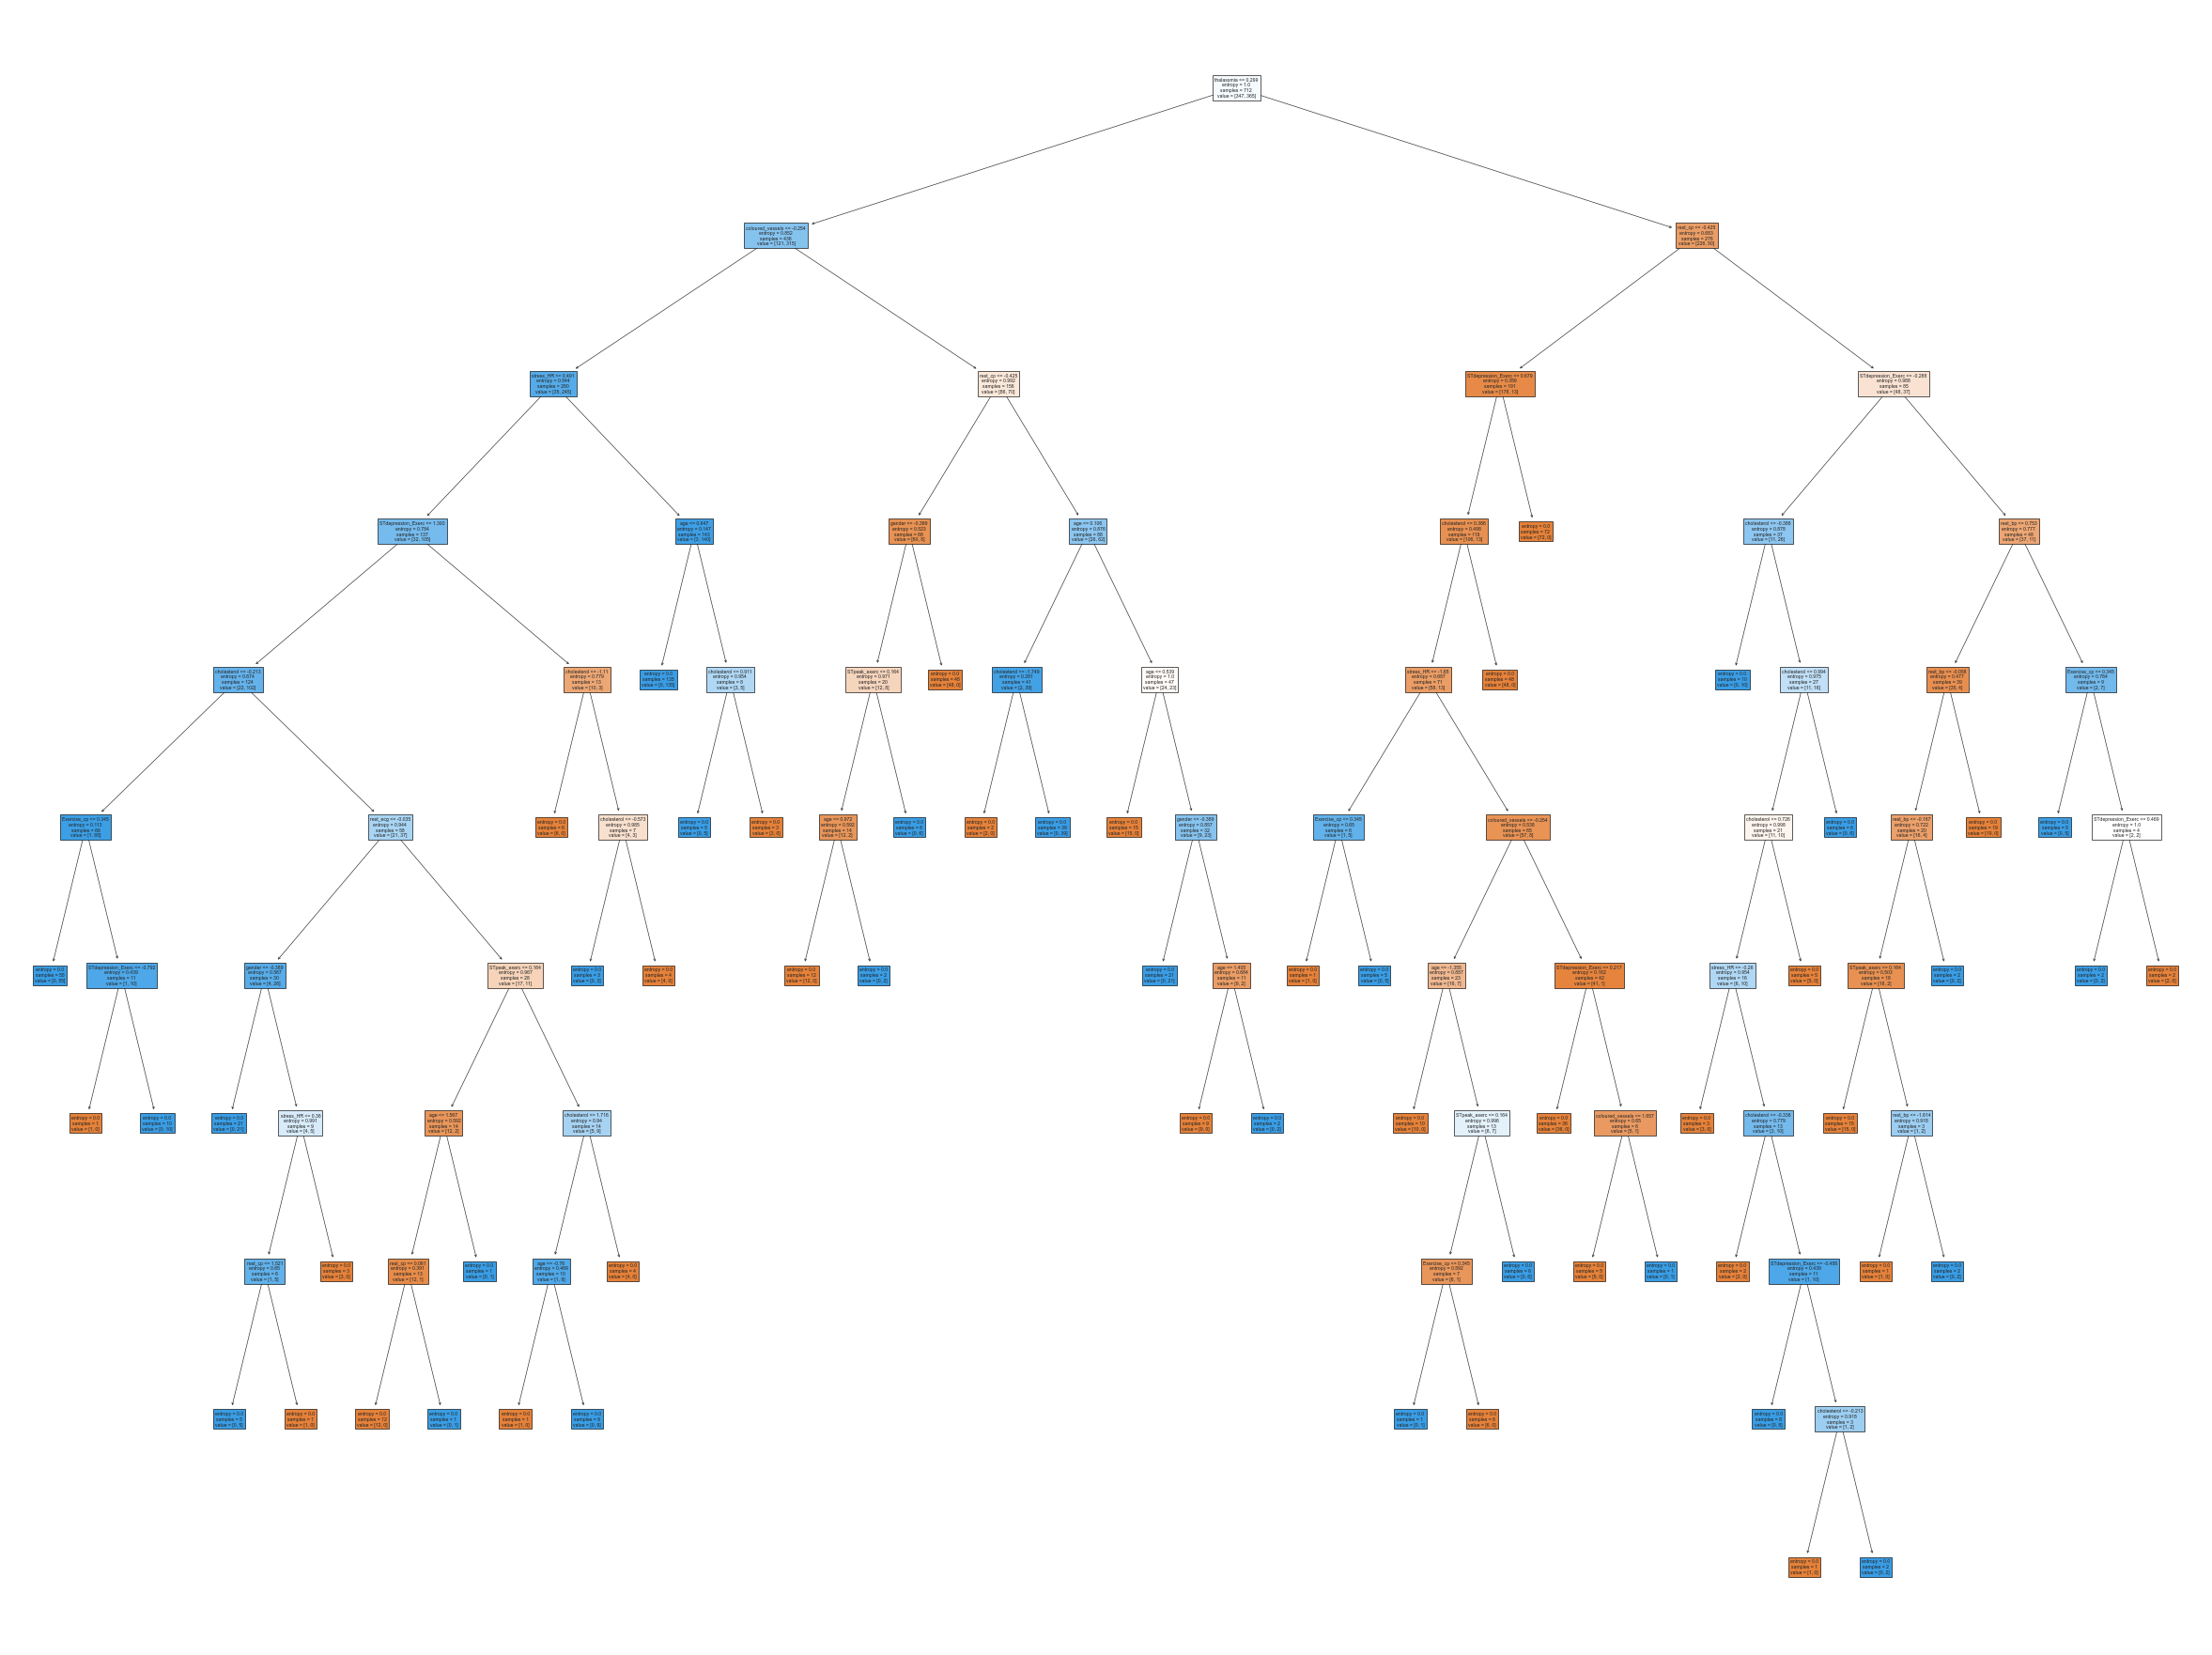

In [156]:
from sklearn.tree import plot_tree
plt.figure(figsize=(20,15),dpi=150)
plot_tree(dt,filled=True,feature_names=X.columns)
plt.show()

In [157]:
#HERE THERE ARE HUGE NUMBER OF BRANCHES IN THE DECISION TREE, in case it is a overfitting problem we
# can reduce the branches.
#PRUNNING :- STEP OF CUTTING BRANCHES OF THE TREE OR DECIDING THE NO. OF BRANCHES(CUSTOMIZATION)

In [158]:
# WE CREATE A USER DEFINED FUNCTION

In [159]:
def report_model(model):
    model_preds=model.predict(X_test1)
    print(classification_report(Y_test1,model_preds))
    print("\n")
    plt.figure(figsize=(12,8),dpi=150)
    plot_tree(model,filled=True,feature_names=X.columns)

In [160]:
#Hyperparameter Tuning in decision Tree

In [161]:
pruned_tree=DecisionTreeClassifier(max_depth=3)
pruned_tree.fit(X_train1,Y_train1)

DecisionTreeClassifier(max_depth=3)

In [162]:
# prunned model decision tree classifier with max branch =3 is created

              precision    recall  f1-score   support

           0       0.80      0.82      0.81       148
           1       0.83      0.81      0.82       158

    accuracy                           0.82       306
   macro avg       0.82      0.82      0.82       306
weighted avg       0.82      0.82      0.82       306





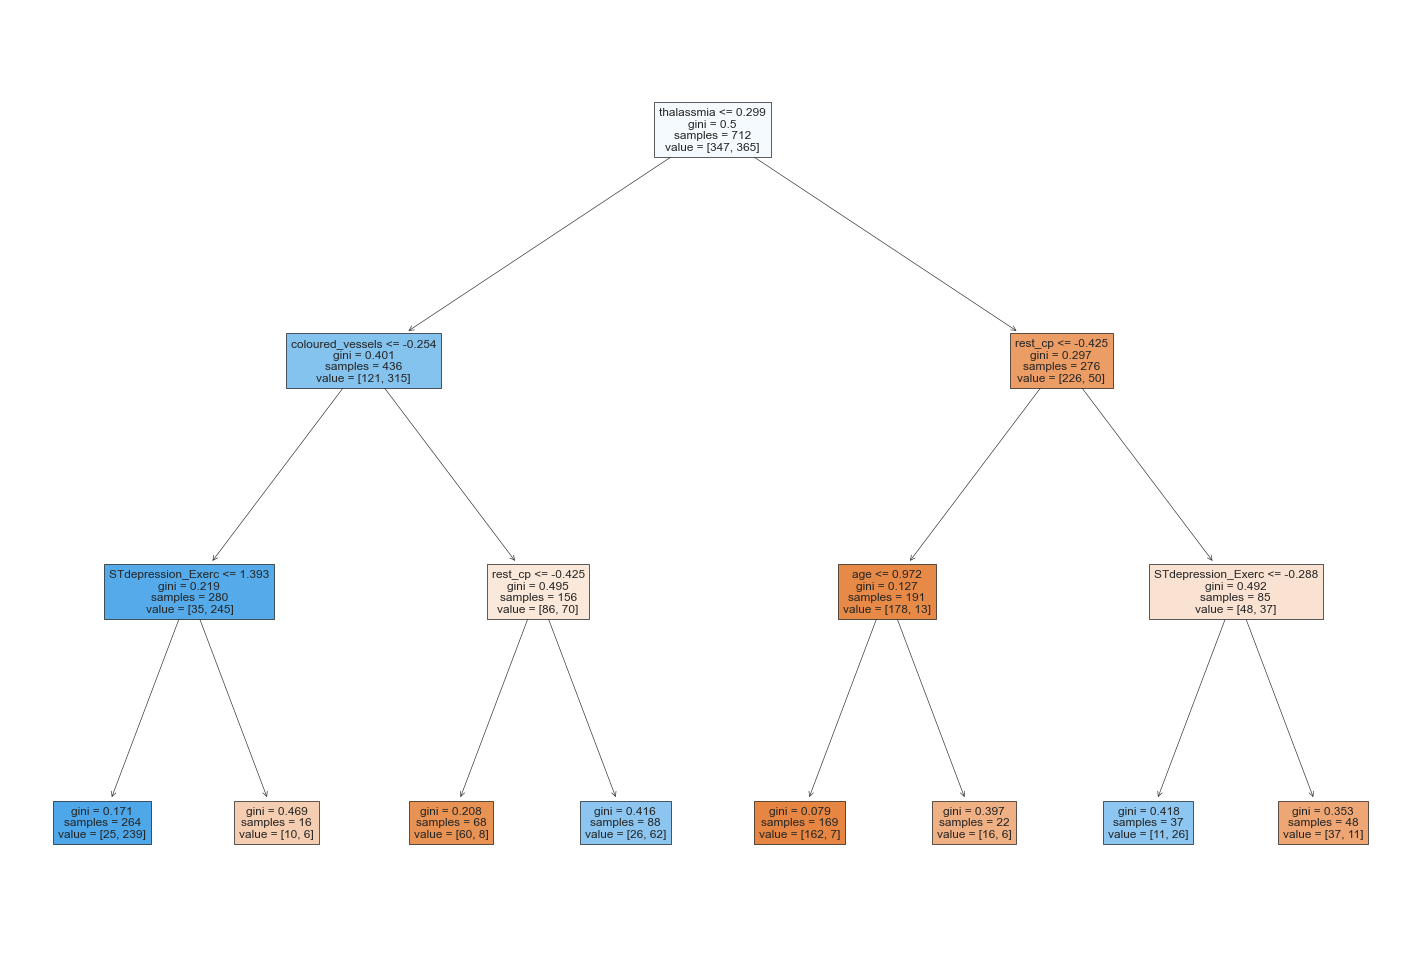

In [163]:
report_model(pruned_tree)

In [164]:
# prunned model decision tree classifier with max branch =5 is created

In [165]:
pruned_tree5=DecisionTreeClassifier(max_depth=5)
pruned_tree5.fit(X_train1,Y_train1)

DecisionTreeClassifier(max_depth=5)

              precision    recall  f1-score   support

           0       0.81      0.86      0.83       148
           1       0.86      0.81      0.83       158

    accuracy                           0.83       306
   macro avg       0.83      0.83      0.83       306
weighted avg       0.83      0.83      0.83       306





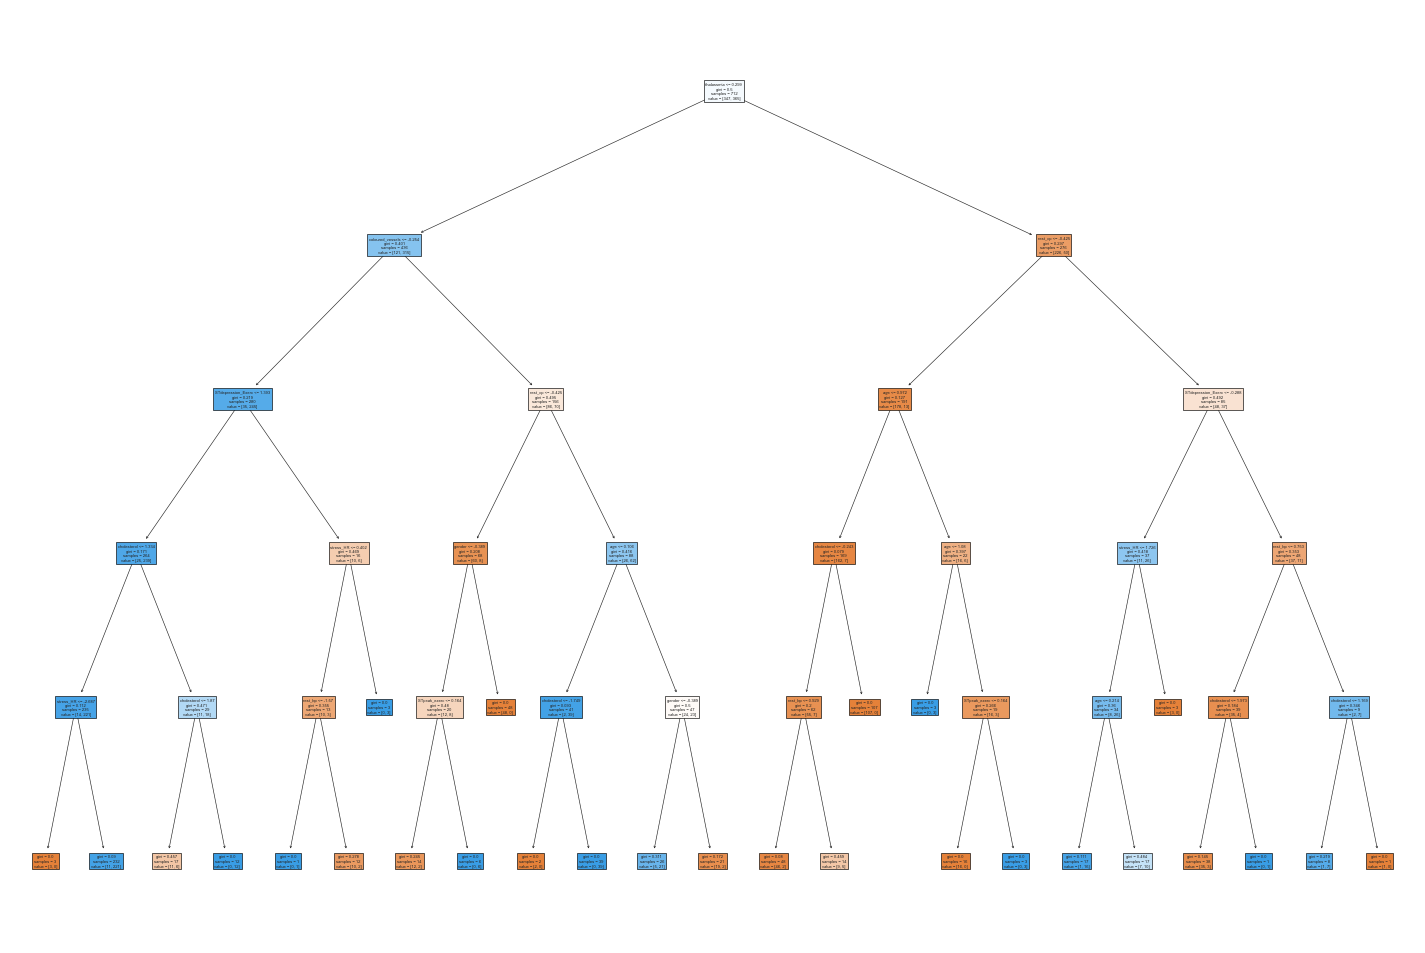

In [166]:
report_model(pruned_tree5)

[[141   7]
 [ 23 135]]


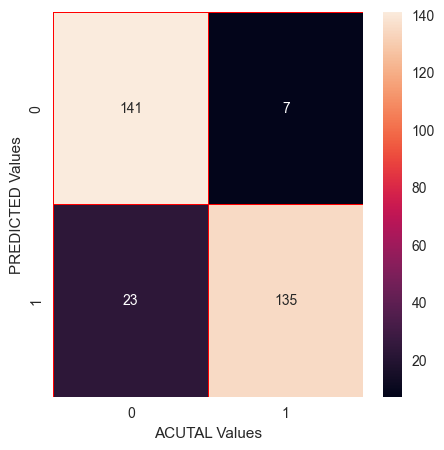

In [167]:
# confusion matrix
dt_conf_mat=confusion_matrix(Y_test1,Y_pred_dt_test)
print(confusion_matrix(Y_test1,Y_pred_dt_test))

#Visualization Confusion Matrix
plt.subplots(figsize=(5,5))
sns.heatmap(dt_conf_mat,annot=True,linewidths=0.5,linecolor="red",fmt=".0f")
plt.xlabel("ACUTAL Values")
plt.ylabel("PREDICTED Values")
plt.show()

In [168]:
print("CLASSIFICATION REPORT DT TRAINING MODEL")
print(classification_report(Y_train1,Y_pred_dt_train))
print("CLASSIFICATION REPORT DT TESTING MODEL")
print(classification_report(Y_test1,Y_pred_dt_test))

CLASSIFICATION REPORT DT TRAINING MODEL
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       347
           1       1.00      1.00      1.00       365

    accuracy                           1.00       712
   macro avg       1.00      1.00      1.00       712
weighted avg       1.00      1.00      1.00       712

CLASSIFICATION REPORT DT TESTING MODEL
              precision    recall  f1-score   support

           0       0.86      0.95      0.90       148
           1       0.95      0.85      0.90       158

    accuracy                           0.90       306
   macro avg       0.91      0.90      0.90       306
weighted avg       0.91      0.90      0.90       306



In [169]:
from sklearn.metrics import roc_auc_score

# predict probabilities
probability_prediction_positive_dt = dt.predict_proba(X_test1)[:,1]

# auc scores
auc_score1_dt = roc_auc_score(Y_test1, probability_prediction_positive_dt)

from sklearn.metrics import roc_curve

# roc curve for models
fpr1_dt, tpr1_dt, thresh1_dt = roc_curve(Y_test1, probability_prediction_positive_dt, pos_label=1)

print("AUC SCORE:",auc_score1_dt)
print()
print("value of FPR", fpr1)
print()
print("Values of TPR",tpr1)
print()
print("values of Threshold", thresh1)

AUC SCORE: 0.9035665412247692

value of FPR [0.         0.         0.         0.00675676 0.02027027 0.02702703
 0.02702703 0.04054054 0.04054054 0.04054054 0.05405405 0.06081081
 0.06081081 0.08108108 0.08108108 0.09459459 0.11486486 0.12162162
 0.14189189 0.16891892 0.17567568 0.19594595 0.21621622 0.22972973
 0.23648649 0.27027027 0.29054054 0.31081081 0.33783784 0.33783784
 0.35810811 0.37837838 0.41891892 0.43918919 0.44594595 0.47972973
 0.50675676 0.56081081 0.57432432 0.58783784 0.64189189 0.68918919
 0.74324324 0.78378378 0.83783784 0.89864865 0.94594595 1.        ]

Values of TPR [0.         0.06962025 0.20253165 0.24050633 0.29113924 0.36708861
 0.41772152 0.43670886 0.50632911 0.53797468 0.59493671 0.62658228
 0.63924051 0.70253165 0.70886076 0.72151899 0.75949367 0.76582278
 0.79113924 0.8164557  0.83544304 0.84177215 0.84177215 0.86075949
 0.89240506 0.91772152 0.93037975 0.93037975 0.94303797 0.94936709
 0.96202532 0.96835443 0.96835443 0.96835443 0.96835443 0.96835443
 0

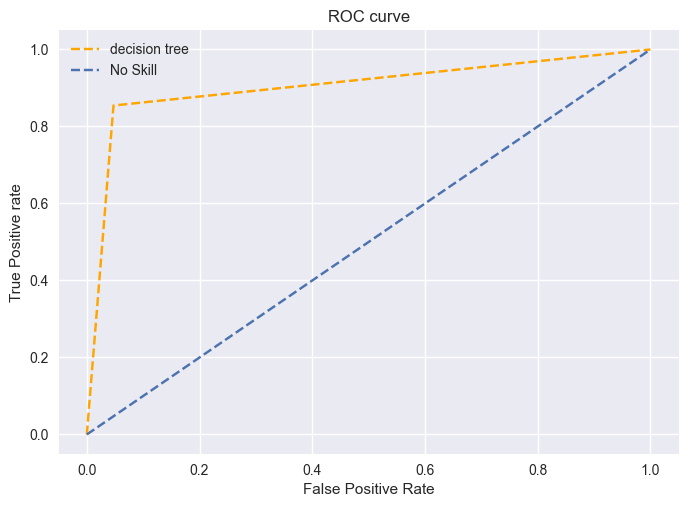

In [170]:
import matplotlib.pyplot as plt
plt.style.use('seaborn')

# plot roc curves
plt.plot(fpr1_dt, tpr1_dt, linestyle='--',color='orange', label='decision tree')

# plot no skill roc curve
plt.plot([0, 1], [0, 1], linestyle='--', label='No Skill')

# title
plt.title('ROC curve')

# x label
plt.xlabel('False Positive Rate')
# y label
plt.ylabel('True Positive rate')

plt.legend(loc='best')

plt.savefig('ROC', dpi=300)
plt.show()

In [171]:
# FEATURE IMPORTANCE with Decision Tree.

In [172]:
dt.feature_importances_

array([0.11608349, 0.06195968, 0.12243658, 0.0338542 , 0.133299  ,
       0.        , 0.01505448, 0.06154439, 0.01905559, 0.07166901,
       0.04476784, 0.10700769, 0.21326804])

In [173]:
pd.DataFrame(index=X.columns,data=dt.feature_importances_,columns=["Feature Importance"])

,Feature Importance
age,0.116083
gender,0.061960
rest_cp,0.122437
rest_bp,0.033854
cholesterol,0.133299
fast_bloodsugar,0.000000
rest_ecg,0.015054
stress_HR,0.061544
Exercise_cp,0.019056
STdepression_Exerc,0.071669


In [174]:
# we see that here the most important feature is thalassmia

# Bagging model

In [175]:
# Bagging Model can reduce the variance without impacting the Bias.
# We prefer to use Bagging when low Bias & high Variance.
# but it is a black box algorithm.

from sklearn.ensemble import BaggingClassifier
bagging=BaggingClassifier()
bagging.fit(X_train1,Y_train1)

BaggingClassifier()

In [176]:
Y_pred_BM_train=bagging.predict(X_train1)
Y_pred_BM_test=bagging.predict(X_test1)

In [177]:
print("Bagging Model training accuracy", accuracy_score(Y_train1,Y_pred_BM_train))
print()
print("Bagging Model testing accuracy", accuracy_score(Y_test1,Y_pred_BM_test))

Bagging Model training accuracy 0.9985955056179775

Bagging Model testing accuracy 0.8921568627450981


In [178]:
print("CLASSIFICATION REPORT ON TRAINING  \n " , classification_report(Y_train1,Y_pred_BM_train))
print()
print("CLASSIFICATION REPORT ON TEST  \n ",classification_report(Y_test1,Y_pred_BM_test))

CLASSIFICATION REPORT ON TRAINING  
                precision    recall  f1-score   support

           0       1.00      1.00      1.00       347
           1       1.00      1.00      1.00       365

    accuracy                           1.00       712
   macro avg       1.00      1.00      1.00       712
weighted avg       1.00      1.00      1.00       712


CLASSIFICATION REPORT ON TEST  
                precision    recall  f1-score   support

           0       0.85      0.95      0.89       148
           1       0.94      0.84      0.89       158

    accuracy                           0.89       306
   macro avg       0.90      0.89      0.89       306
weighted avg       0.90      0.89      0.89       306



In [179]:
print(confusion_matrix(Y_train1,Y_pred_BM_train))
print()
print(confusion_matrix(Y_test1,Y_pred_BM_test))
BM_conf_mat=confusion_matrix(Y_test1,Y_pred_BM_test)

[[347   0]
 [  1 364]]

[[140   8]
 [ 25 133]]


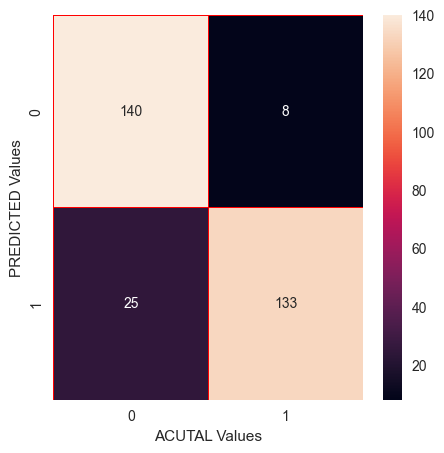

In [180]:
plt.subplots(figsize=(5,5))
sns.heatmap(BM_conf_mat,annot=True,linewidths=0.5,linecolor="red",fmt=".0f")
plt.xlabel("ACUTAL Values")
plt.ylabel("PREDICTED Values")
plt.show()

In [181]:
# IN BAGGING METHOD ROW WISE REPLACEMENT SAMPLE CREATED.
# THERE MAY BE CHANCES THAT THE TEST DATA MAY BE ENTIRELY DIFFERENT THAN TRAIN DATA 
# IT IS CALLED DATA LEACKAGE( EXP PRACTICING MOCK TEST OF ANY EXAM , BUT IN REAL EXAM PAPER ARE NOT
# PATTERN AS PER MOCK TEST OR THE SYLLUBUS OUT OF RANGE)
# IN RANDOM FOREST IT IS TAKEN ONE STEP FURTHER THAT IS ROW WISE AS WELL AS COLUMN WISE REPLACEMENT
# SAMPLING.
# SOME PART OF DATA ARE RESERVED IN OOB, FOR CROSS VALIDATION.

# RANDOM FOREST WITH ENTROPY

In [182]:
# here in RF by default we get the no. of estimators (n_estimator=100) as 100
# n_estimators: We know that a random forest is nothing but a group of many decision trees, 
# the n_estimator parameter controls the number of trees inside the classifier.
# we can change the no. of estimators(n_estimator=200/500 any number).
# in RF by default the criterion is GINI, We can change it to ENTROPY.
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier(n_estimators=50,criterion="entropy")

In [183]:
rf.fit(X_train1,Y_train1)

RandomForestClassifier(criterion='entropy', n_estimators=50)

In [184]:
# RANDOM FOREST MODEL BUILDING COMPLETED.

In [185]:
Y_pred_rf_train=rf.predict(X_train1)
Y_pred_rf_test=rf.predict(X_test1)

In [186]:
print("RANDOM FOREST METHOD ENTROPY TRAINING ACCURACY ",accuracy_score(Y_train1,Y_pred_rf_train))
print()
print("RANDOM FOREST METHOD ENTROPY TESTING ACCURACY ",accuracy_score(Y_test1,Y_pred_rf_test))

RANDOM FOREST METHOD ENTROPY TRAINING ACCURACY  1.0

RANDOM FOREST METHOD ENTROPY TESTING ACCURACY  0.9477124183006536


[[347   0]
 [  0 365]]

[[143   5]
 [ 11 147]]


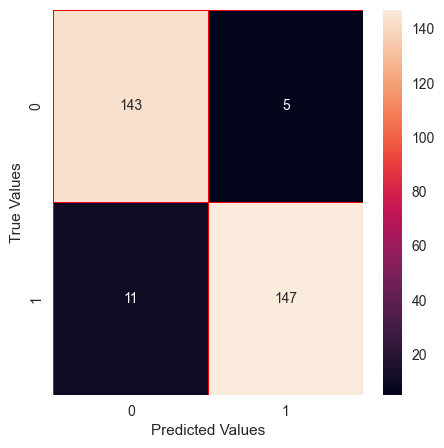

In [187]:
RF_conf_mat=confusion_matrix(Y_test1,Y_pred_rf_test)
print(confusion_matrix(Y_train1,Y_pred_rf_train))
print()
print(confusion_matrix(Y_test1,Y_pred_rf_test))

plt.subplots(figsize=(5,5))
sns.heatmap(RF_conf_mat,annot=True,linewidths=0.5,linecolor="red",fmt=".0f")
plt.xlabel("Predicted Values")
plt.ylabel("True Values")
plt.show()

In [188]:
print("CLASSIFICATION REPORT RANDOM FOREST TRAINING MODEL")
print(classification_report(Y_train1,Y_pred_rf_train))
print("CLASSIFICATION REPORT RANDOM FOREST TESTING MODEL")
print(classification_report(Y_test1,Y_pred_rf_test))

CLASSIFICATION REPORT RANDOM FOREST TRAINING MODEL
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       347
           1       1.00      1.00      1.00       365

    accuracy                           1.00       712
   macro avg       1.00      1.00      1.00       712
weighted avg       1.00      1.00      1.00       712

CLASSIFICATION REPORT RANDOM FOREST TESTING MODEL
              precision    recall  f1-score   support

           0       0.93      0.97      0.95       148
           1       0.97      0.93      0.95       158

    accuracy                           0.95       306
   macro avg       0.95      0.95      0.95       306
weighted avg       0.95      0.95      0.95       306



In [189]:
# Feature Importance with random forest

In [190]:
pd.DataFrame(index=X.columns,data=rf.feature_importances_,columns=["Feature Importance"])

,Feature Importance
age,0.108025
gender,0.043017
rest_cp,0.118759
rest_bp,0.053235
cholesterol,0.088212
fast_bloodsugar,0.011609
rest_ecg,0.024740
stress_HR,0.130590
Exercise_cp,0.047848
STdepression_Exerc,0.079365


In [191]:
# almost all features are significance some are more some are less.

In [192]:
# using Extra Trees classifier for feature importance and plotting a graph of feature importances
# for better visualization.

[0.08248844 0.05621936 0.13483775 0.01683962 0.06666367 0.0234812
 0.03866736 0.10340026 0.10243219 0.05852238 0.07206808 0.12662667
 0.11775303]


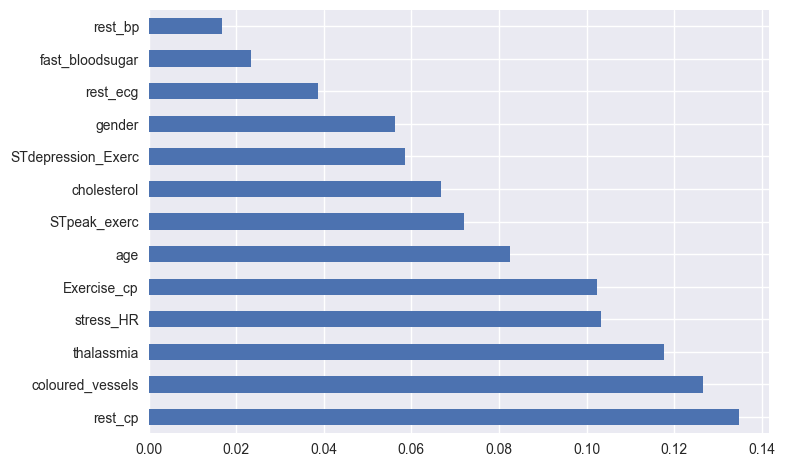

In [193]:
from sklearn.ensemble import ExtraTreesClassifier
model = ExtraTreesClassifier()
model.fit(X,Y)
print(model.feature_importances_) 
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(13).plot(kind='barh')
plt.show()

In [194]:
# The XGBoost library provides a built-in function to plot features ordered by their importance. 
# The function is called plot_importance.

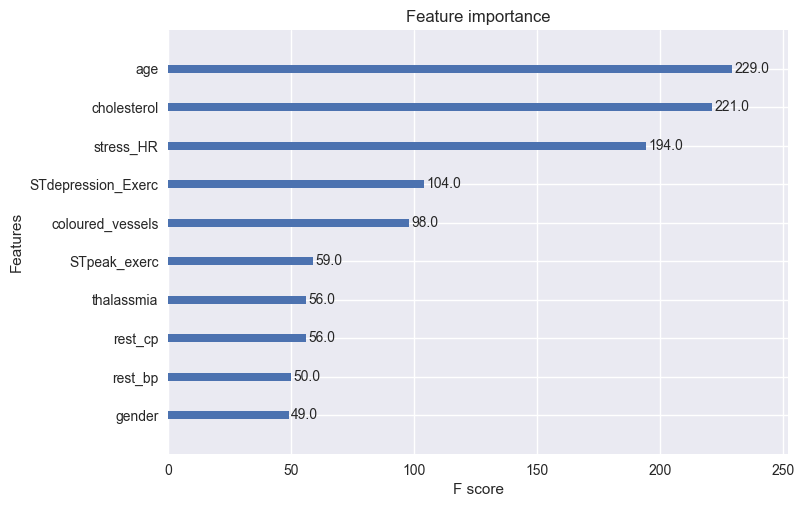

In [195]:
# plot feature importance using built-in function
from xgboost import XGBClassifier
from xgboost import plot_importance

# fit model no training data

model = XGBClassifier(n_estimators=100)
model.fit(X, Y)
# plot feature importance
plot_importance(model,max_num_features=10) # top 10 most important features
plt.show()

# RANDOM FOREST WITH CRITERION GINI


In [196]:
rf1=RandomForestClassifier(n_estimators=200,criterion="gini")
rf1.fit(X_train1,Y_train1)

RandomForestClassifier(n_estimators=200)

In [197]:
Y_pred_rf_ginni_train=rf1.predict(X_train1)
Y_pred_rf_ginni_test=rf1.predict(X_test1)

In [198]:
print("RANDOM FOREST METHOD GINI TRAINING ACCURACY ",accuracy_score(Y_train1,Y_pred_rf_ginni_train))
print()
print("RANDOM FOREST METHOD ENTROPY TESTING ACCURACY ",accuracy_score(Y_test1,Y_pred_rf_ginni_test))

RANDOM FOREST METHOD GINI TRAINING ACCURACY  1.0

RANDOM FOREST METHOD ENTROPY TESTING ACCURACY  0.9575163398692811


In [199]:
# classification report.
print("classification report for training set:")
print(classification_report(Y_train1,Y_pred_rf_ginni_train))
print("classification report for testing set:")
print(classification_report(Y_test1,Y_pred_rf_ginni_test))

classification report for training set:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       347
           1       1.00      1.00      1.00       365

    accuracy                           1.00       712
   macro avg       1.00      1.00      1.00       712
weighted avg       1.00      1.00      1.00       712

classification report for testing set:
              precision    recall  f1-score   support

           0       0.93      0.99      0.96       148
           1       0.99      0.93      0.96       158

    accuracy                           0.96       306
   macro avg       0.96      0.96      0.96       306
weighted avg       0.96      0.96      0.96       306



# Gaussian Naive Bayes model

In [200]:
# used in Medical diagnosis, Face Recognization,as a classifier, to identify faces and other features, weather prediction..
# training the model on training set
# probability approached based algorithm.
# widely used in text classification. 
# In real world is for normal industries not much in use in classification becoz we have many other
# models RF,DT,XG BOOST .

from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
gnb.fit(X_train1, Y_train1)
Y_pred_gnb_train=gnb.predict(X_train1) 
# making predictions on the testing set
Y_pred_gnb_test = gnb.predict(X_test1)
 
# comparing actual response values (y_test) with predicted response values (y_pred)
from sklearn import metrics
print("Gaussian Naive Bayes model accuracy(in %):", metrics.accuracy_score(Y_test1, Y_pred_gnb_test)*100)

Gaussian Naive Bayes model accuracy(in %): 83.98692810457517


In [201]:
print("GAUSSIAN NAIVE BAYES METHOD TRAINING ACCURACY ",accuracy_score(Y_train1,Y_pred_gnb_train))
print()
print("GAUSSIAN NAIVE BAYES METHOD TESTING ACCURACY ",accuracy_score(Y_test1,Y_pred_gnb_test))

GAUSSIAN NAIVE BAYES METHOD TRAINING ACCURACY  0.8497191011235955

GAUSSIAN NAIVE BAYES METHOD TESTING ACCURACY  0.8398692810457516


In [202]:
# classification report.
print("classification report for training set:")
print(classification_report(Y_train1,Y_pred_gnb_train))
print("classification report for testing set:")
print(classification_report(Y_test1,Y_pred_gnb_test))

classification report for training set:
              precision    recall  f1-score   support

           0       0.87      0.82      0.84       347
           1       0.84      0.88      0.86       365

    accuracy                           0.85       712
   macro avg       0.85      0.85      0.85       712
weighted avg       0.85      0.85      0.85       712

classification report for testing set:
              precision    recall  f1-score   support

           0       0.85      0.82      0.83       148
           1       0.83      0.86      0.85       158

    accuracy                           0.84       306
   macro avg       0.84      0.84      0.84       306
weighted avg       0.84      0.84      0.84       306



# ADABOOST Adaptive Boosting

In [203]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
ab=AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=1),n_estimators=100)
ab.fit(X_train1,Y_train1)

AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=1),
                   n_estimators=100)

In [204]:
ab.score(X_train1,Y_train1)

0.9325842696629213

In [205]:
ab.score(X_test1,Y_test1)

0.8529411764705882

In [206]:
y_pred_ada_dt_train=ab.predict(X_train1)
y_pred_ada_dt_test=ab.predict(X_test1)

In [207]:
# classification report.
print("classification report for training set:")
print(classification_report(Y_train1,y_pred_ada_dt_train))
print("classification report for testing set:")
print(classification_report(Y_test1,y_pred_ada_dt_test))

classification report for training set:
              precision    recall  f1-score   support

           0       0.93      0.93      0.93       347
           1       0.93      0.94      0.93       365

    accuracy                           0.93       712
   macro avg       0.93      0.93      0.93       712
weighted avg       0.93      0.93      0.93       712

classification report for testing set:
              precision    recall  f1-score   support

           0       0.82      0.90      0.86       148
           1       0.90      0.81      0.85       158

    accuracy                           0.85       306
   macro avg       0.86      0.85      0.85       306
weighted avg       0.86      0.85      0.85       306



In [208]:
#USING RANDOM FOREST IN ADABOOST.(INPLACE OF DT WE ARE USING RANDOM FOREST)

In [209]:
from sklearn.ensemble import RandomForestClassifier
ab1=AdaBoostClassifier(base_estimator=RandomForestClassifier(n_estimators=20,max_depth=2),n_estimators=100)

In [210]:
ab1.fit(X_train1,Y_train1)

AdaBoostClassifier(base_estimator=RandomForestClassifier(max_depth=2,
                                                         n_estimators=20),
                   n_estimators=100)

In [211]:
ab1.score(X_train1,Y_train1)

1.0

In [212]:
ab1.score(X_test1,Y_test1)

0.934640522875817

In [213]:
y_pred_ada_rf_train=ab.predict(X_train1)
y_pred_ada_rf_test=ab.predict(X_test1)

In [214]:
# classification report
print("Classification report for training set:")
print(classification_report(Y_train1,y_pred_ada_rf_train))
print()
print("Classification report for testing set:")
print(classification_report(Y_test1,y_pred_ada_rf_test))

Classification report for training set:
              precision    recall  f1-score   support

           0       0.93      0.93      0.93       347
           1       0.93      0.94      0.93       365

    accuracy                           0.93       712
   macro avg       0.93      0.93      0.93       712
weighted avg       0.93      0.93      0.93       712


Classification report for testing set:
              precision    recall  f1-score   support

           0       0.82      0.90      0.86       148
           1       0.90      0.81      0.85       158

    accuracy                           0.85       306
   macro avg       0.86      0.85      0.85       306
weighted avg       0.86      0.85      0.85       306



# GRADIENT BOOSTING

In [215]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import mean_squared_error as MSE

In [216]:
# Instantiate Gradient Boosting classifier
SEED = 2 # Setting SEED for reproducibility
gbt = GradientBoostingClassifier(n_estimators = 25, max_depth = 1, random_state = SEED)
 
# Fit to training set
gbt.fit(X_train1, Y_train1)

# Predict on train set
Y_pred_train_gbt = gbt.predict(X_train1)

# Predict on test set
Y_pred_test_gbt = gbt.predict(X_test1)
  
# test set RMSE
test_rmse = MSE(Y_test1, Y_pred_test_gbt) ** (1 / 2)
  
# Print rmse
print('RMSE test set: {:.2f}'.format(test_rmse))

RMSE test set: 0.40


In [217]:
gbt.score(X_test1,Y_test1)

0.8366013071895425

In [218]:
gbt.score(X_train1,Y_train1)

0.8567415730337079

In [219]:
y_pred_gbt_train=ab.predict(X_train1)
y_pred_gbt_test=ab.predict(X_test1)

In [220]:
# classification report
print("Classification report for training set:")
print(classification_report(Y_train1,y_pred_gbt_train))
print()
print("Classification report for testing set:")
print(classification_report(Y_test1,y_pred_gbt_test))

Classification report for training set:
              precision    recall  f1-score   support

           0       0.93      0.93      0.93       347
           1       0.93      0.94      0.93       365

    accuracy                           0.93       712
   macro avg       0.93      0.93      0.93       712
weighted avg       0.93      0.93      0.93       712


Classification report for testing set:
              precision    recall  f1-score   support

           0       0.82      0.90      0.86       148
           1       0.90      0.81      0.85       158

    accuracy                           0.85       306
   macro avg       0.86      0.85      0.85       306
weighted avg       0.86      0.85      0.85       306



In [221]:
#LEAST SQUARE LOSS

In [222]:
test_score=np.zeros(30,dtype=np.float64)
train_score=np.zeros(30,dtype=np.float64)
for i,Y_pred in enumerate(gbt.staged_predict(X_train1)):
    train_score[i]=gbt.loss_(Y_train1,Y_pred_train_gbt)
for i,Y_pred in enumerate(gbt.staged_predict(X_test1)):
    test_score[i]=gbt.loss_(Y_test1,Y_pred_test_gbt)

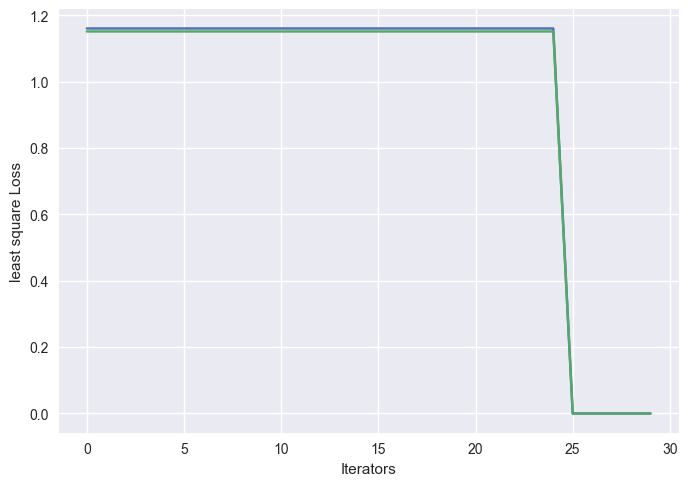

In [223]:
plt.plot(test_score)
plt.plot(train_score)
plt.xlabel("Iterators")
plt.ylabel("least square Loss")
plt.show()

In [224]:
def log_loss_prime(Y_test, Y_pred_test_gbt):
    return ((1 - Y_test1) / (1 - Y_pred_test_gbt) - Y_test1 / Y_pred_test_gbt) / np.size(Y_test1)

In [225]:
print(log_loss_prime(Y_test1, Y_pred_test_gbt))

909    NaN
241    inf
433    NaN
952    NaN
148    NaN
      ... 
906    NaN
403    NaN
843    inf
334    NaN
499    NaN
Name: heart_disease, Length: 306, dtype: float64


In [226]:
from sklearn.metrics import log_loss
LogLoss = log_loss(Y_test1, Y_pred_test_gbt, eps = 1e-15,
normalize = True, sample_weight = None, labels = None)

In [227]:
LogLoss

5.643661466915521

In [228]:
from sklearn.metrics import mean_squared_error
  
MSE = mean_squared_error(Y_test1, Y_pred_test_gbt)

In [229]:
MSE

0.16339869281045752

# XG BOOST

In [230]:
from xgboost import XGBClassifier

In [231]:
from sklearn.model_selection import cross_val_score
scores=cross_val_score(XGBClassifier(objective="reg:squarederror"),X_test1,Y_test1)

In [232]:
scores

array([0.83870968, 0.81967213, 0.80327869, 0.91803279, 0.8852459 ])

In [233]:
# rmse
rmse_score=(scores)**0.5
rmse_score.mean()

0.923288381435259

# CONCLUSION 

### From the above study we derived various importan data driven insights regarding the cardiovascular disease that tells us lot about it, apart from that we trained various machine learning models that can help us predict if the disease is present or not and tested out which of the models were performing better than the others using various evaluation metrics and KPI's, and finally in the end we took the best performing model and deployed it to a simple web application that can help us predict the disease given a bunch of variables. Lastly we present the report and the analysis to the stakeholders using a powerpoint prsentation.